# SolarPowerGeneration Project

## EDA

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Data
data = pd.read_csv("solarpowergeneration.csv")

In [4]:
df = data.copy()

In [5]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [6]:
df.shape

(2920, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [8]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


### Histogram for All Features

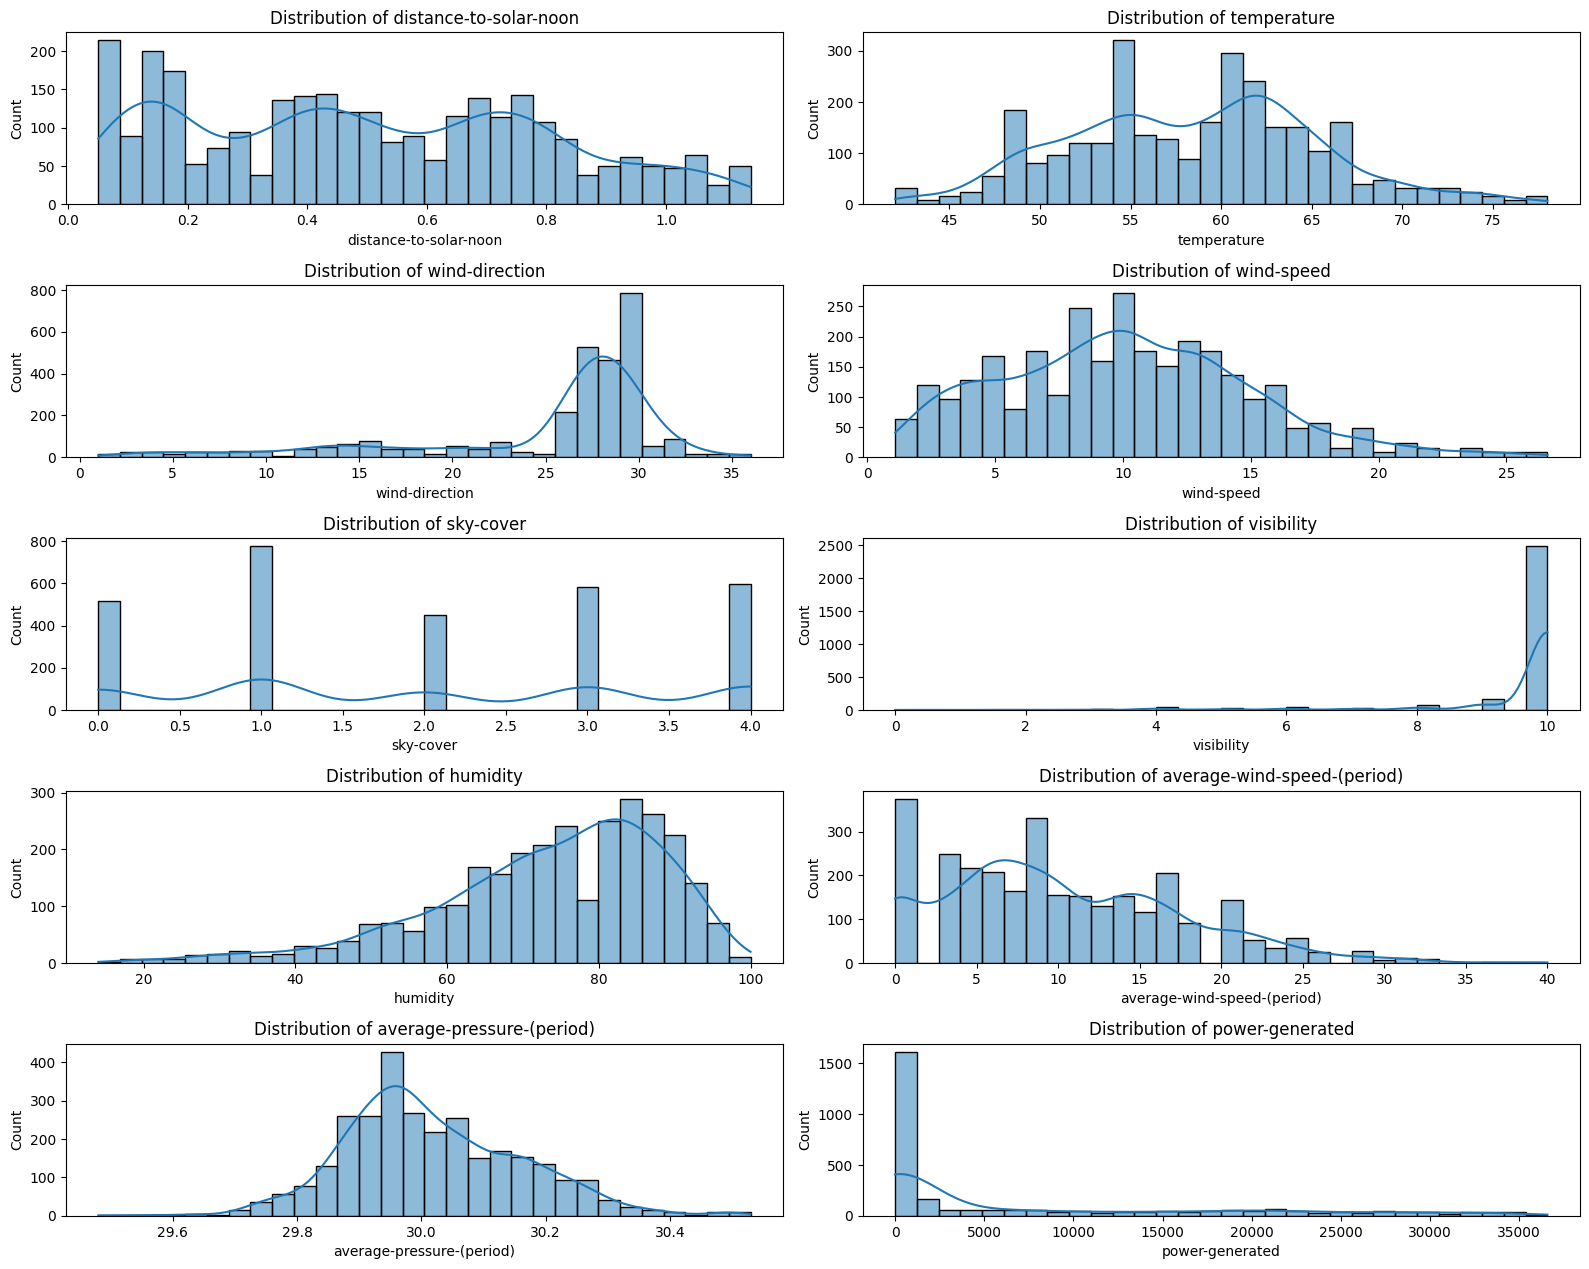

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Check for Missing Values

In [10]:
# Check number of missing values per column
print(df.isnull().sum())

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


### Handling Missing Values

In [11]:
df['average-wind-speed-(period)']=df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].median())

### Confirm All Missing Values Are Handled

In [12]:
print("Remaining missing values:\n")
df.isnull().sum()

Remaining missing values:



,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),0
average-pressure-(period),0
power-generated,0


### Check for Duplicate Rows

In [13]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


###  Drop the Column

In [14]:
print(df['visibility'].value_counts())

visibility
10.00    2491
9.00      169
8.00       73
4.00       43
6.00       42
7.00       36
5.00       29
3.00       14
1.50        6
2.50        4
0.25        4
2.00        2
0.50        2
1.75        2
0.00        1
0.75        1
1.25        1
Name: count, dtype: int64


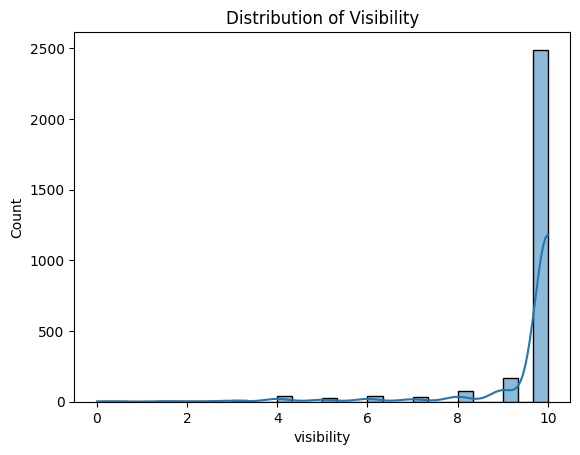

In [15]:
sns.histplot(df['visibility'], kde=True, bins=30)
plt.title("Distribution of Visibility")
plt.show()

In [16]:
df['visibility'].describe()

,visibility
count,2920.000000
mean,9.557705
std,1.383884
min,0.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,10.000000


In [17]:
df.drop(columns=['visibility'], inplace=True)

### Outlier Detection and Handling

### Visual Outlier Detection using Boxplots

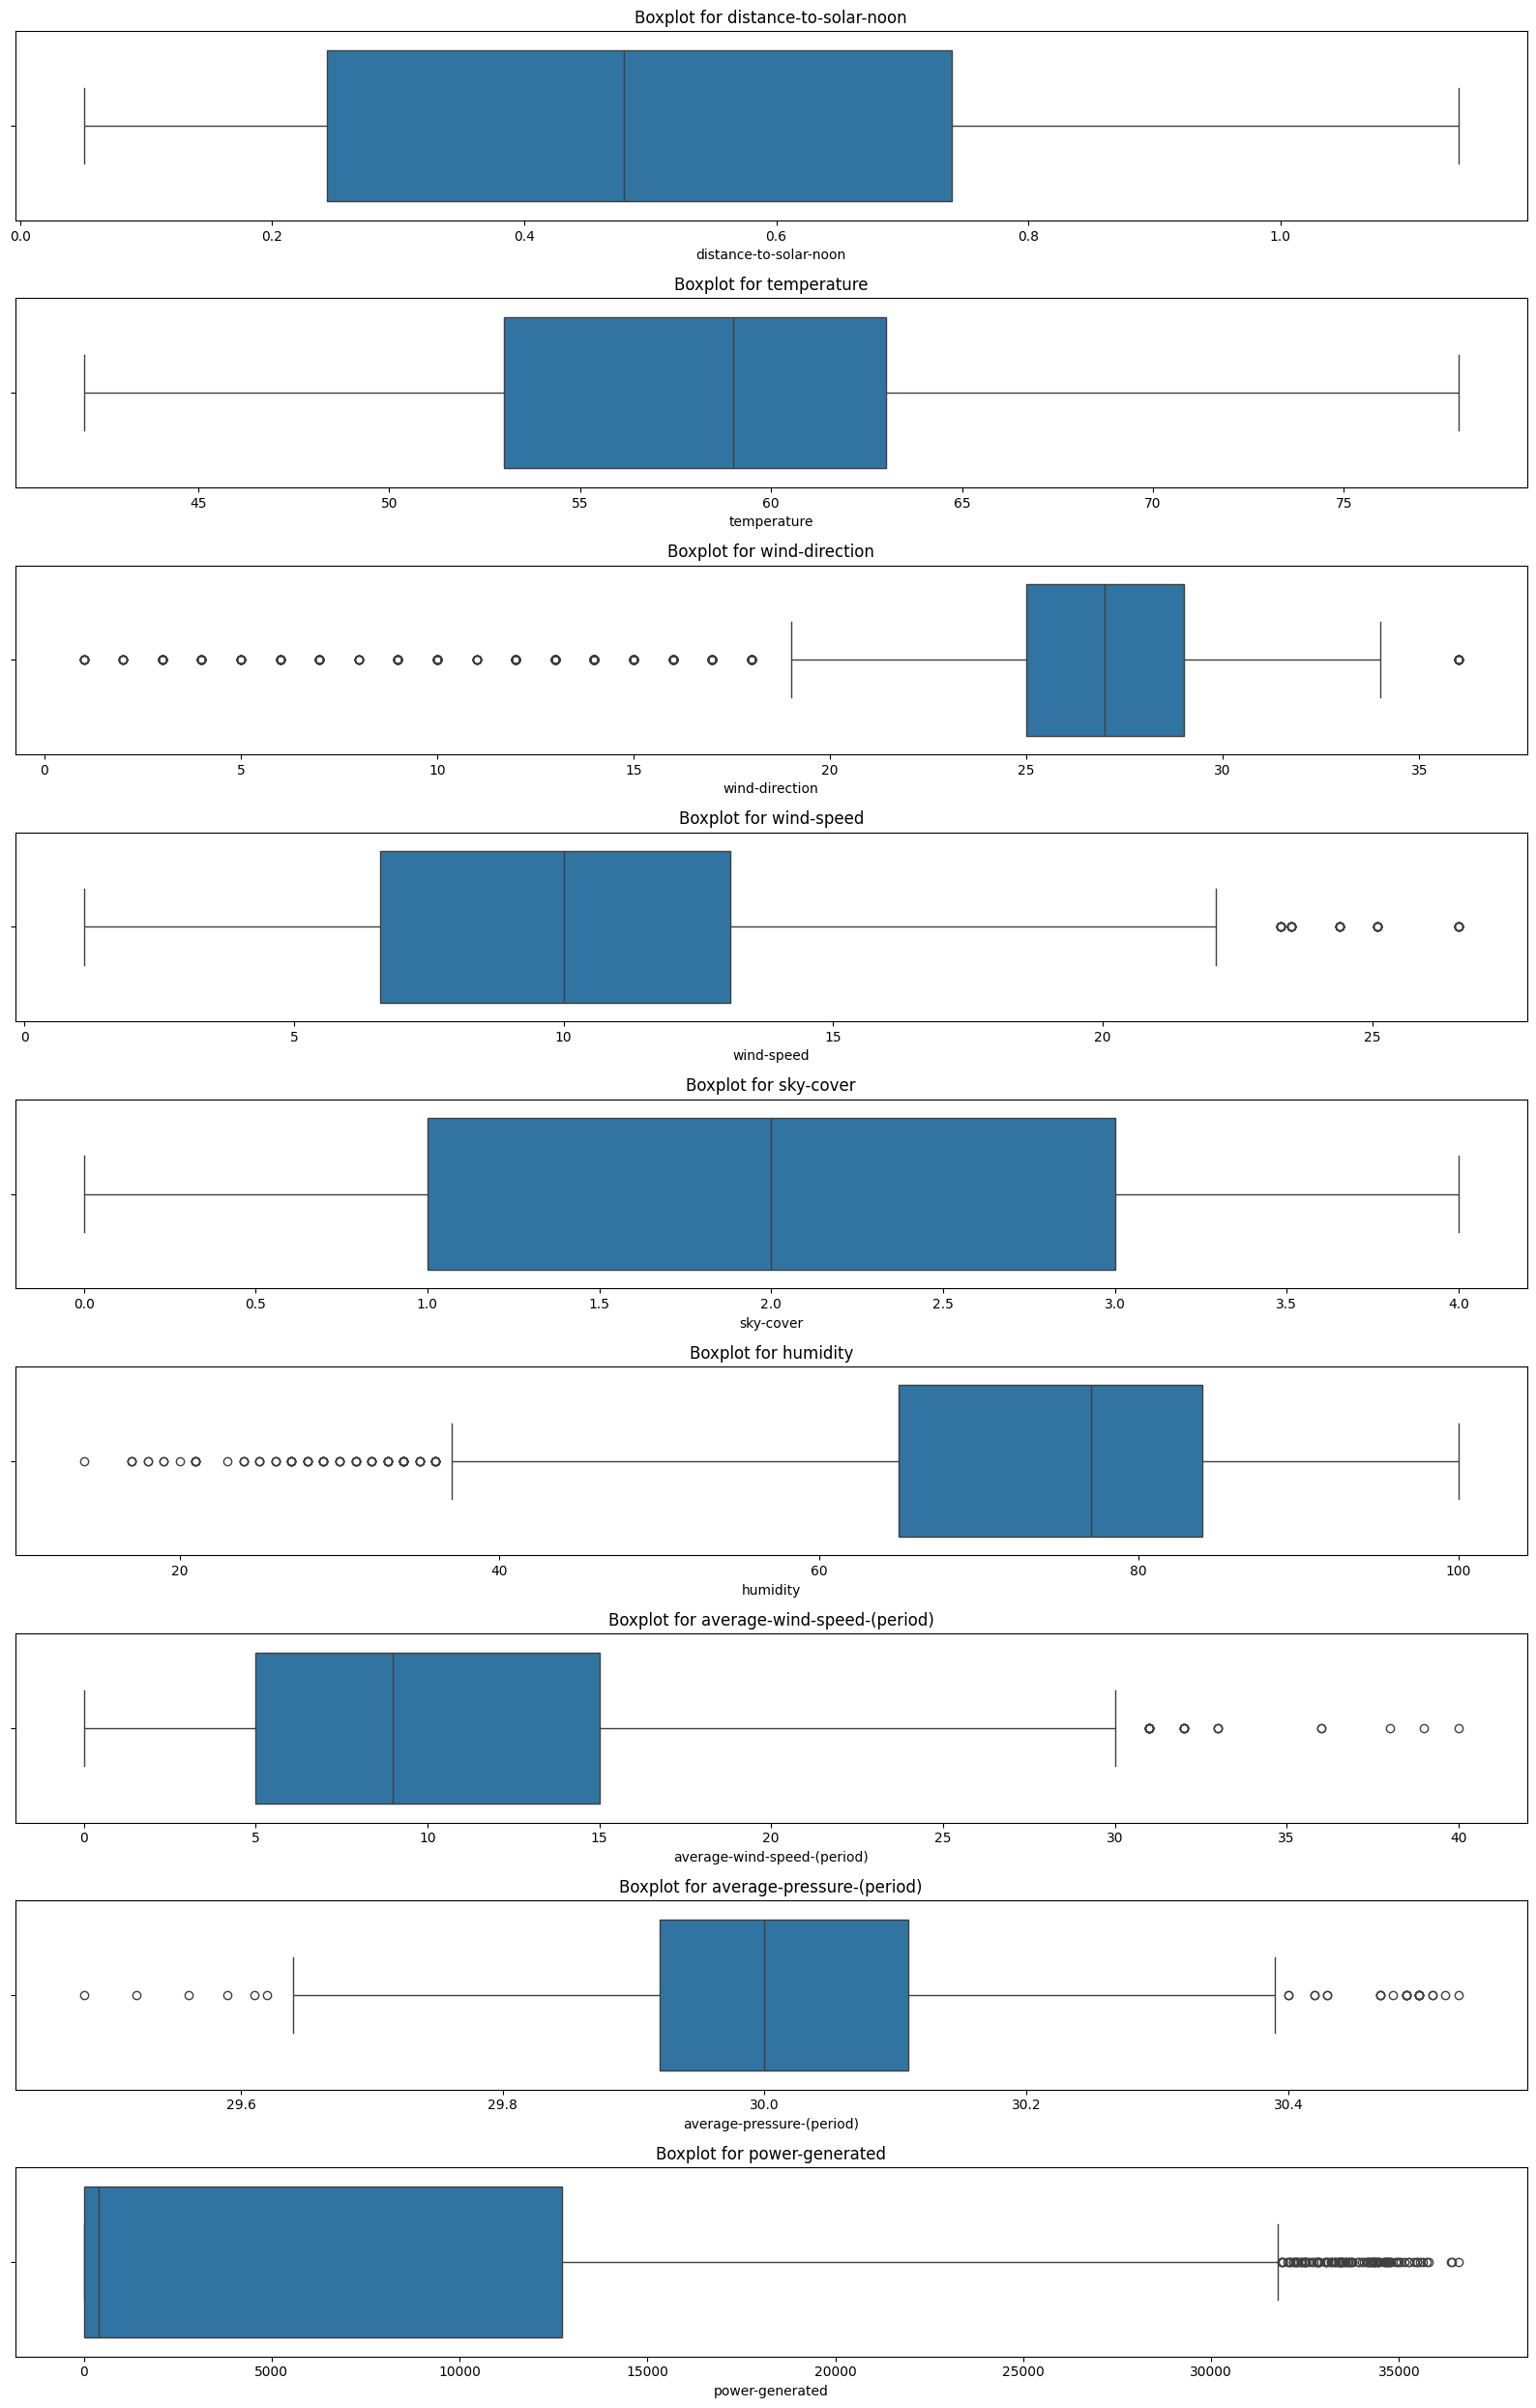

In [18]:
# Numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

### Outlier Detection using IQR (Interquartile Range)

In [19]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return len(outliers)

# Detect outliers in all numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_counts = {}

for col in numeric_cols:
    count = detect_outliers_iqr(df, col)
    outlier_counts[col] = count

# Display results
for col, count in outlier_counts.items():
    print(f"Number of outliers in '{col}': {count}")

Number of outliers in 'distance-to-solar-noon': 0
Number of outliers in 'temperature': 0
Number of outliers in 'wind-direction': 528
Number of outliers in 'wind-speed': 40
Number of outliers in 'sky-cover': 0
Number of outliers in 'humidity': 83
Number of outliers in 'average-wind-speed-(period)': 25
Number of outliers in 'average-pressure-(period)': 31
Number of outliers in 'power-generated': 107


###  Handling Outliers

### Cap Outliers

In [20]:
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])
    return data

# Apply to all numeric columns
for col in numeric_cols:
    df = cap_outliers(df, col)

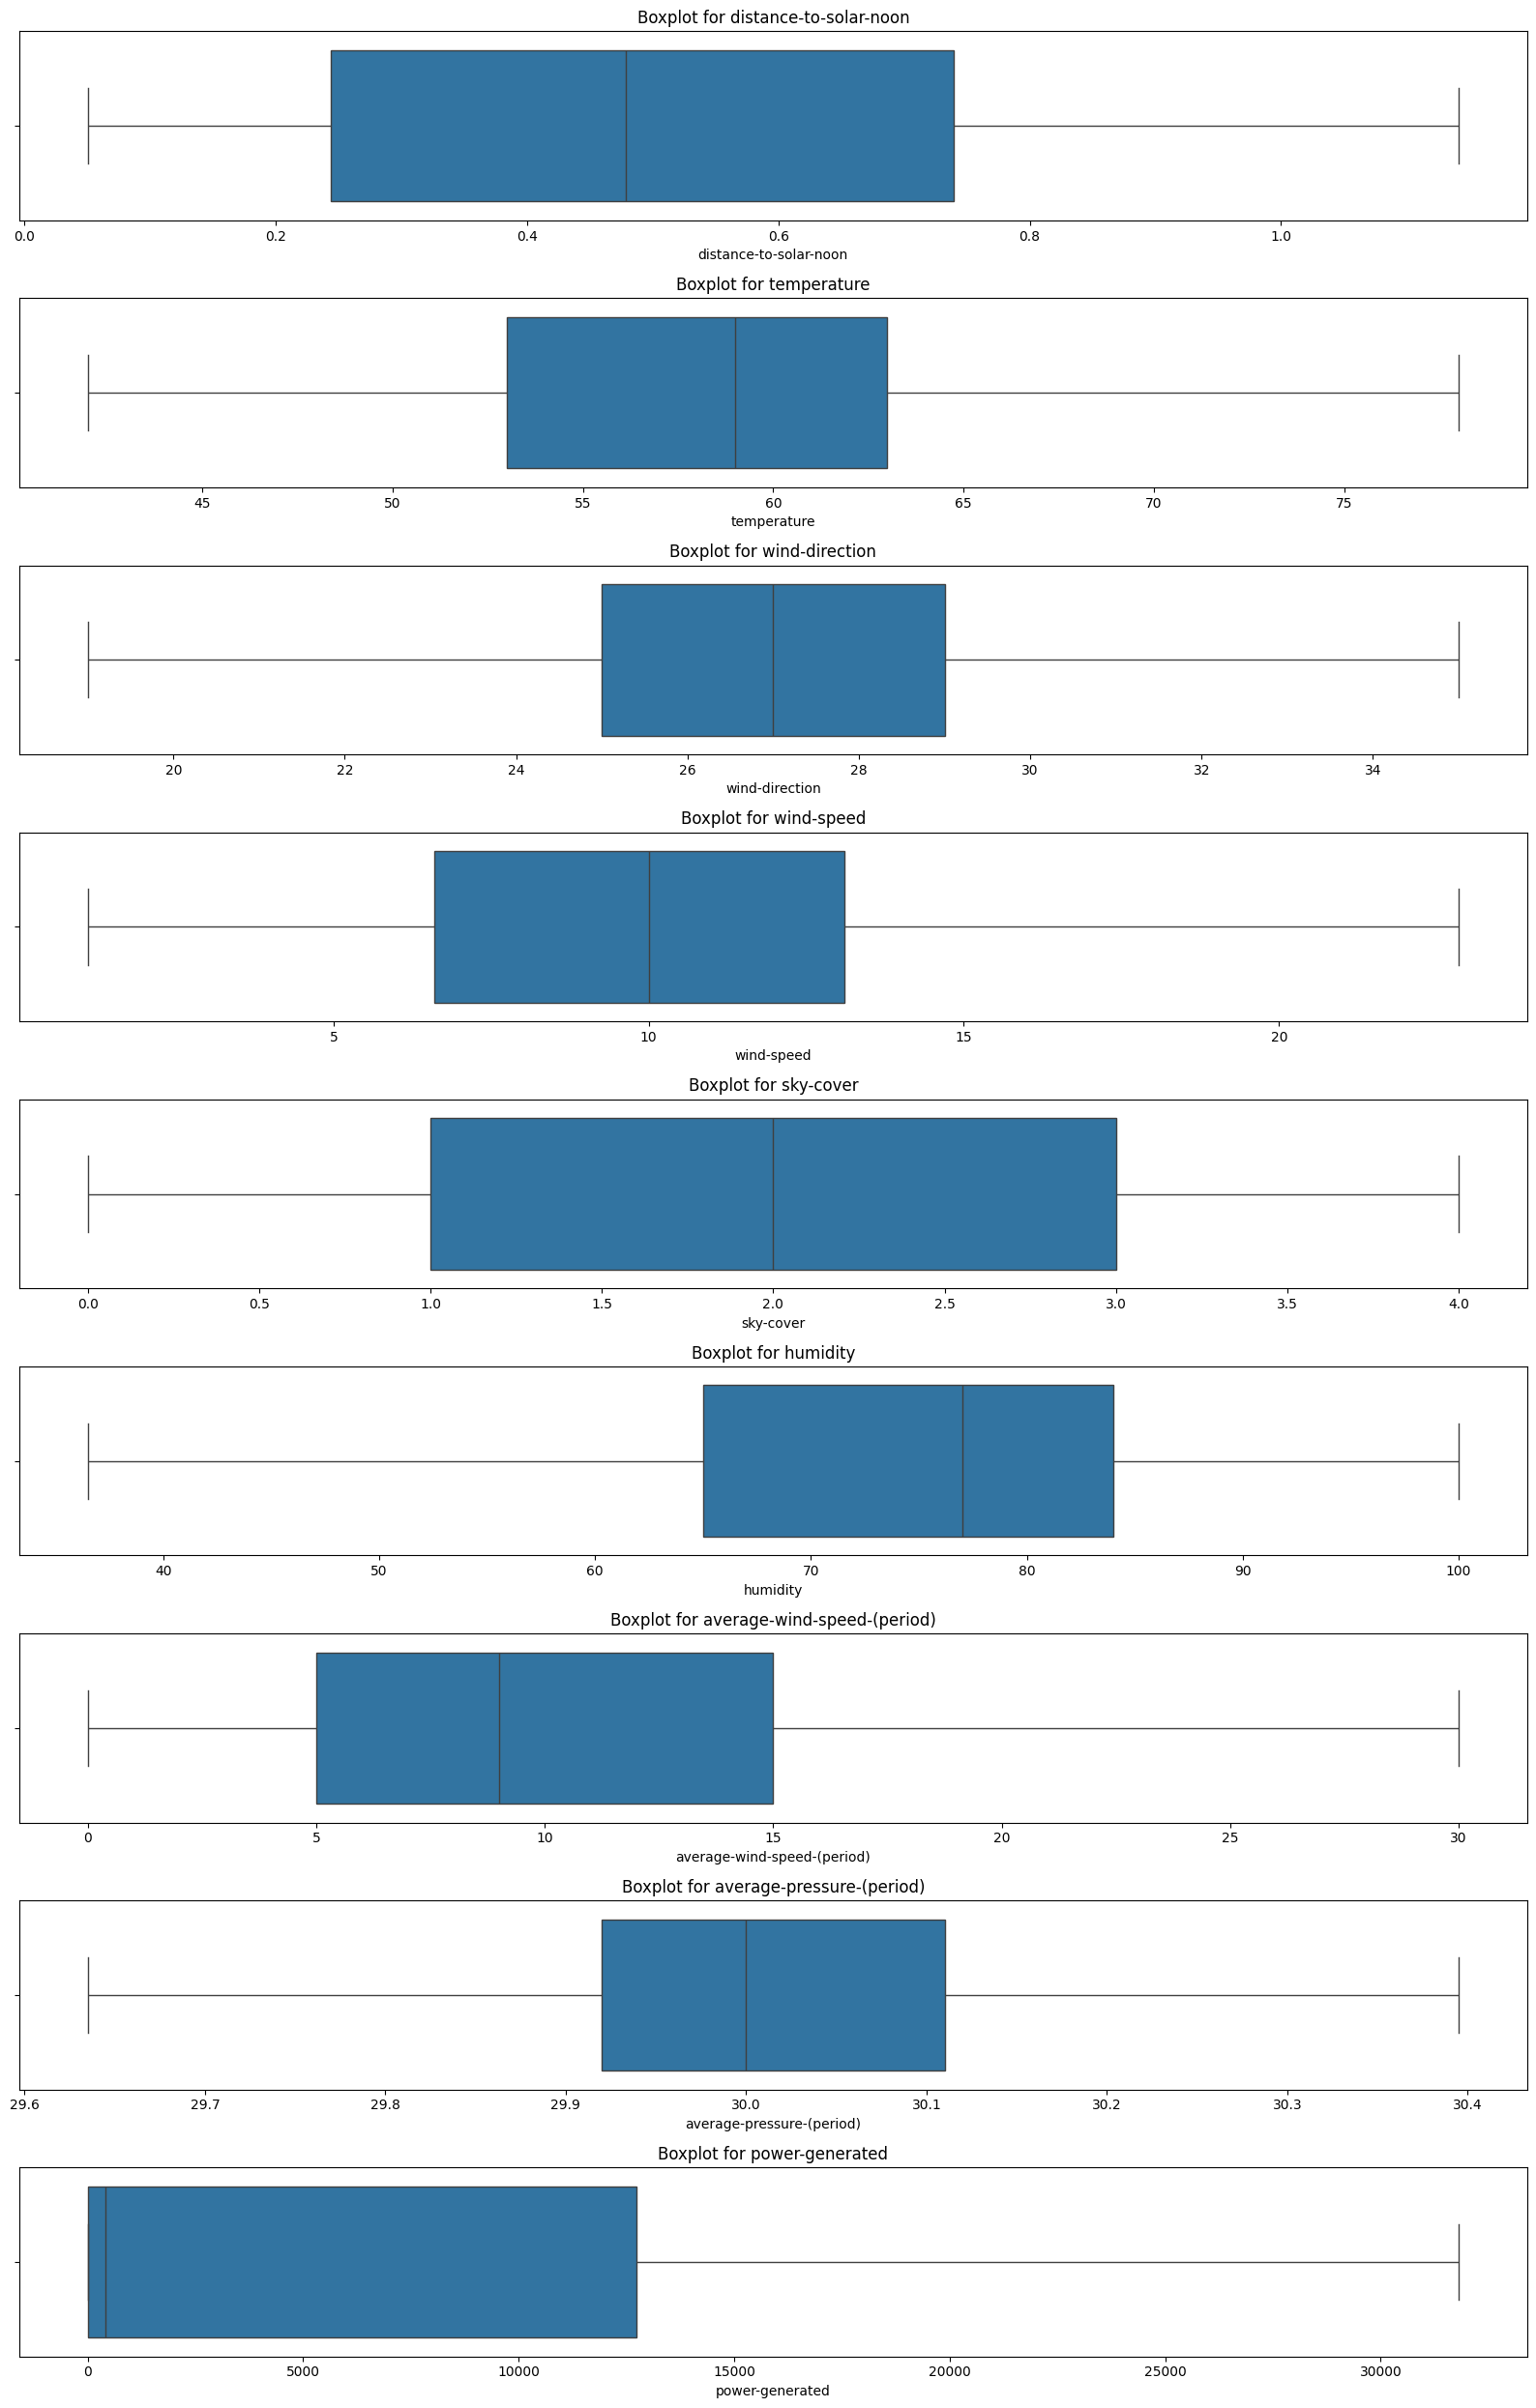

In [21]:
# Numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

### Heatmap

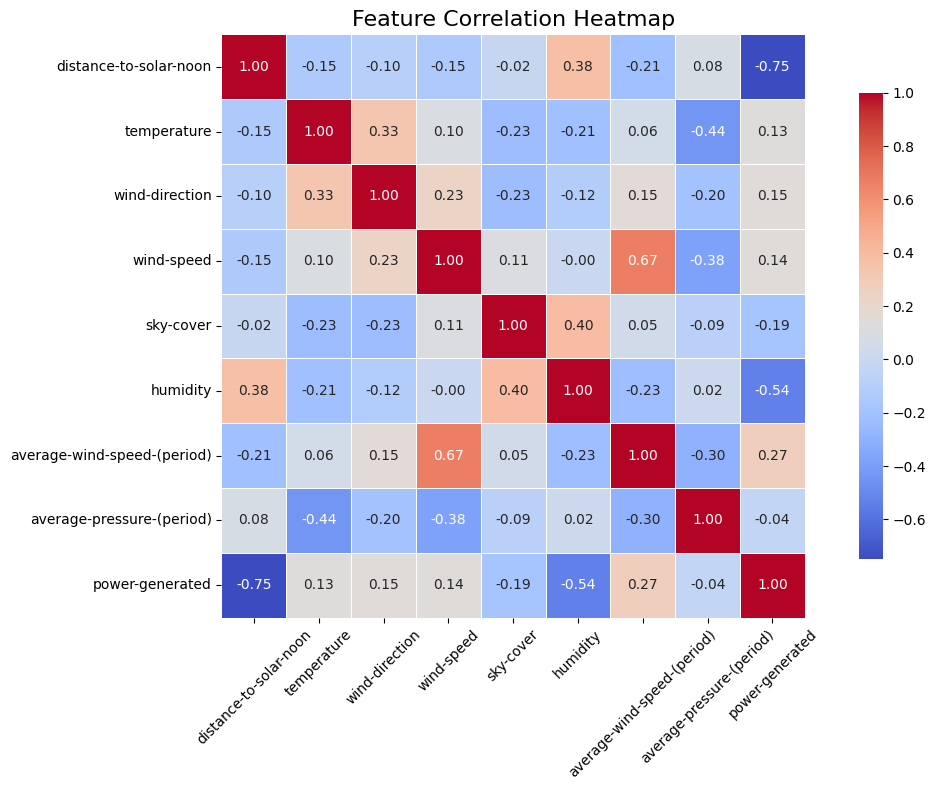

In [22]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

#Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Show correlation values
    fmt=".2f",          # Format to 2 decimal places
    cmap="coolwarm",    # Color map
    square=True,        # Make cells square
    linewidths=0.5,     # Add lines between squares
    cbar_kws={"shrink": 0.8}  # Shrink color bar
)


#Add title and display
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Correlation with Target Variable

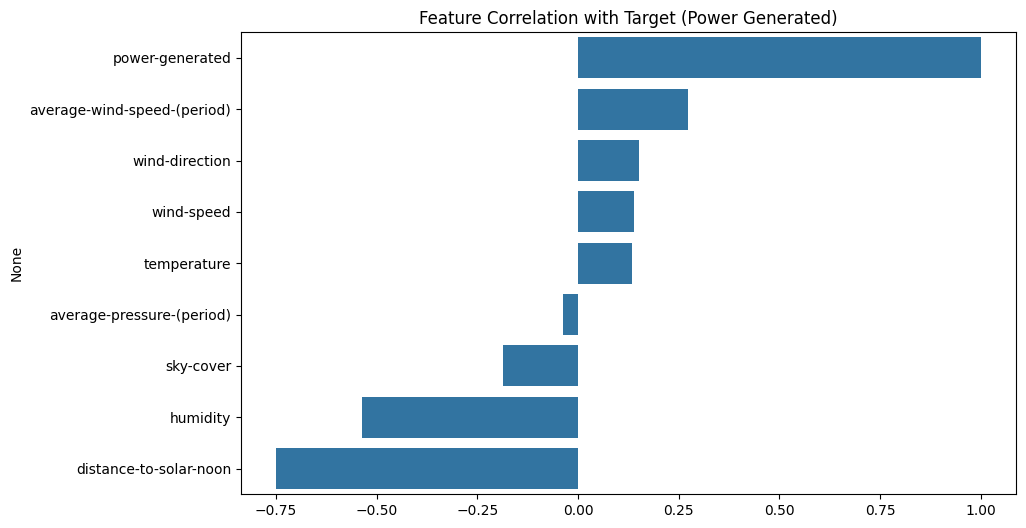

Top correlated features: ['average-wind-speed-(period)', 'wind-direction', 'wind-speed', 'temperature', 'average-pressure-(period)']


In [23]:
# Correlation matrix
corr_matrix = df.corr()

# Plot correlation with target only
target_corr = corr_matrix['power-generated'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Feature Correlation with Target (Power Generated)')
plt.show()

# Top correlated features
top_corr_features = target_corr[1:6].index.tolist()
print("Top correlated features:", top_corr_features)

In [24]:
df.skew()

,0
distance-to-solar-noon,0.211452
temperature,0.125916
wind-direction,-0.759444
wind-speed,0.320330
sky-cover,0.080284
humidity,-0.725126
average-wind-speed-(period),0.552060
average-pressure-(period),0.368321
power-generated,1.260141


In [25]:
df['power-generated'].isnull().sum()

np.int64(0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   float64
 2   wind-direction               2920 non-null   float64
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   float64
 5   humidity                     2920 non-null   float64
 6   average-wind-speed-(period)  2920 non-null   float64
 7   average-pressure-(period)    2920 non-null   float64
 8   power-generated              2920 non-null   float64
dtypes: float64(9)
memory usage: 205.4 KB


### Handling categorical columns - Encoding

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   float64
 2   wind-direction               2920 non-null   float64
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   float64
 5   humidity                     2920 non-null   float64
 6   average-wind-speed-(period)  2920 non-null   float64
 7   average-pressure-(period)    2920 non-null   float64
 8   power-generated              2920 non-null   float64
dtypes: float64(9)
memory usage: 205.4 KB


In [28]:
columns = df.columns

In [29]:
for col in columns:
    print(f"{col}: {df[col].nunique()}")

distance-to-solar-noon: 2660
temperature: 37
wind-direction: 17
wind-speed: 155
sky-cover: 5
humidity: 56
average-wind-speed-(period): 25
average-pressure-(period): 76
power-generated: 1423


In [30]:
df['sky-cover'].unique()

array([0., 1., 3., 4., 2.])

## Note:
- sky-cover seems to be a categorical column, so better encode it

### Onehot encoding

In [31]:
df = pd.get_dummies(df, columns=['sky-cover'], drop_first=True)

In [32]:
df['sky-cover_1.0'].unique()

array([False,  True])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   float64
 2   wind-direction               2920 non-null   float64
 3   wind-speed                   2920 non-null   float64
 4   humidity                     2920 non-null   float64
 5   average-wind-speed-(period)  2920 non-null   float64
 6   average-pressure-(period)    2920 non-null   float64
 7   power-generated              2920 non-null   float64
 8   sky-cover_1.0                2920 non-null   bool   
 9   sky-cover_2.0                2920 non-null   bool   
 10  sky-cover_3.0                2920 non-null   bool   
 11  sky-cover_4.0                2920 non-null   bool   
dtypes: bool(4), float64(8)
memory usage: 194.0 KB


In [34]:
df.skew()

,0
distance-to-solar-noon,0.211452
temperature,0.125916
wind-direction,-0.759444
wind-speed,0.320330
humidity,-0.725126
average-wind-speed-(period),0.552060
average-pressure-(period),0.368321
power-generated,1.260141
sky-cover_1.0,1.061124
sky-cover_2.0,1.924290


In [35]:
print(df.columns.tolist())


['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'power-generated', 'sky-cover_1.0', 'sky-cover_2.0', 'sky-cover_3.0', 'sky-cover_4.0']


###  Feature Scaling

### Using StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('power-generated', axis=1)
y = df['power-generated']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),sky-cover_1.0,sky-cover_2.0,sky-cover_3.0,sky-cover_4.0
0,1.196765,1.539688,0.426856,-0.539694,0.087755,-0.292971,-1.414580,-0.601615,-0.425711,-0.497859,-0.507481
1,0.420310,1.539688,0.426856,-0.539694,0.226321,-0.710615,-1.199392,-0.601615,-0.425711,-0.497859,-0.507481
2,-0.356146,1.539688,0.426856,-0.539694,-0.258662,-1.406688,-0.912474,-0.601615,-0.425711,-0.497859,-0.507481
3,-1.132602,1.539688,0.426856,-0.539694,-2.579652,-1.406688,-0.769015,-0.601615,-0.425711,-0.497859,-0.507481
4,-1.469066,1.539688,0.426856,-0.539694,-2.579652,-0.989044,-0.912474,-0.601615,-0.425711,-0.497859,-0.507481


### Multicollinearity Check using VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create DataFrame for VIF
X_vif = pd.DataFrame(X_scaled, columns=X.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("Variance Inflation Factors:")
print(vif_data.sort_values(by="VIF", ascending=False))

Variance Inflation Factors:
                        Feature       VIF
10                sky-cover_4.0  2.382852
7                 sky-cover_1.0  2.123780
3                    wind-speed  2.117471
5   average-wind-speed-(period)  2.096111
9                 sky-cover_3.0  2.077370
8                 sky-cover_2.0  1.894362
4                      humidity  1.608025
1                   temperature  1.516852
6     average-pressure-(period)  1.514920
0        distance-to-solar-noon  1.287557
2                wind-direction  1.248044


### Interpretation:
All VIF values are below the threshold of 5, indicating no significant multicollinearity among the predictors. This suggests that the features are sufficiently independent from each other, and the regression model should not suffer from inflated coefficient variances due to multicollinearity.

### Feature Selection Based on Model Importance

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_scaled_df, y)

RandomForestRegressor(random_state=42)

In [39]:
# Get Feature Importances
importances = model.feature_importances_
feature_names = X_scaled_df.columns

In [40]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

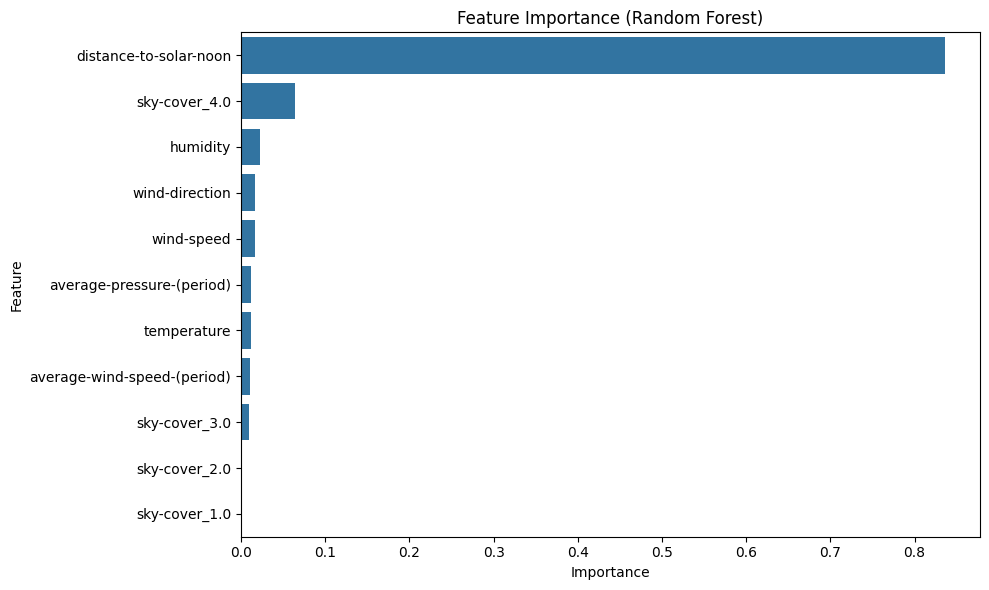

In [41]:
#Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [42]:
X_scaled_df.skew()

,0
distance-to-solar-noon,0.211452
temperature,0.125916
wind-direction,-0.759444
wind-speed,0.320330
humidity,-0.725126
average-wind-speed-(period),0.552060
average-pressure-(period),0.368321
sky-cover_1.0,1.061124
sky-cover_2.0,1.924290
sky-cover_3.0,1.511520


## Train test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

In [45]:
# Check shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2336, 11)
Test shape: (584, 11)


# Model Building

###  Linear Models
- Linear Regressor

- Elastic Net Regressor

### Non-Linear Models
- Support Vector Regressor (RBF Kernel)

- Random Forest Regressor

- XGBoost Regressor

- LightGBM Regressor



## Evaluation function for Any Regressor

In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name=None, results_dict=None, cv_folds=5):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics for train
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Metrics for test
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Store results
    if results_dict is not None and model_name:
        results_dict[model_name] = {
            'Train': {'R²': r2_train, 'RMSE': rmse_train, 'MAE': mae_train},
            'Test':  {'R²': r2_test,  'RMSE': rmse_test,  'MAE': mae_test},
        }

    # Print results
    print(f"\n{model_name or 'Model'} Results:")
    print(f"Train -> R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")
    print(f"Test  -> R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")

# Dictionary to hold all results
results = {}


## Linear Regressor

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [48]:
# Fit scikit-learn Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_lr = linear_model.predict(X_test)

In [49]:
# Evaluation
evaluate_model(linear_model, X_train, y_train, X_test, y_test, "Linear Regression", results)


Linear Regression Results:
Train -> R²: 0.6681, RMSE: 5842.6865, MAE: 4738.6044
Test  -> R²: 0.6398, RMSE: 6052.8131, MAE: 4849.1747


## Using statsmodels for Linear Regression

In [50]:
# Add constant term for intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the full summary
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        power-generated   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     425.4
Date:                Sun, 27 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:34:28   Log-Likelihood:                -23575.
No. Observations:                2336   AIC:                         4.717e+04
Df Residuals:                    2324   BIC:                         4.724e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        6983.8711    121.252     57.598      0.000    6746.098    7221.644
distance-to-solar-noon      -6376.1933    136.794    -46.612      0.000   -6644.444   -6107.943
temperature                  -364.4216    150.395     -2.423      0.015    -659.345     -69.499
wind-direction                298.4022    135.613      2.200      0.028      32.467     564.338
wind-speed                      2.3495    178.564      0.013      0.990    -347.811     352.510
humidity                    -2505.5568    154.673    -16.199      0.000   -2808.869   -2202.245
average-wind-speed-(period)   734.3285    175.938      4.174      0.000     389.317    1079.341
average-pressure-(period)     244.8325    149.123      1.642      0.101     -47.596     537.261
sky-cover_1.0                 493.2638    178.430      2.764      0.006     143.365     843.163
sky-cover_2.0                 108.1642    165.882      0.652      0.514    -217.128     433.457
sky-cover_3.0                -170.4816    175.332     -0.972      0.331    -514.305     173.342
sky-cover_4.0               -1203.3688    186.956     -6.437      0.000   -1569.987    -836.750
==============================================================================
Omnibus:                       11.998   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.205
Skew:                           0.132   Prob(JB):                      0.00369
Kurtosis:                       2.788   Cond. No.                         4.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Add constant to test set
X_test_sm = sm.add_constant(X_test)

# Make predictions
y_pred_sm = model_sm.predict(X_test_sm)

In [52]:
r2 = r2_score(y_test, y_pred_sm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sm))
mae = mean_absolute_error(y_test, y_pred_sm)

print(f"R² Score: {r2:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")

R² Score: 0.6398
RMSE    : 6052.8131
MAE     : 4849.1747


### Step-by-Step Diagnostic Plots

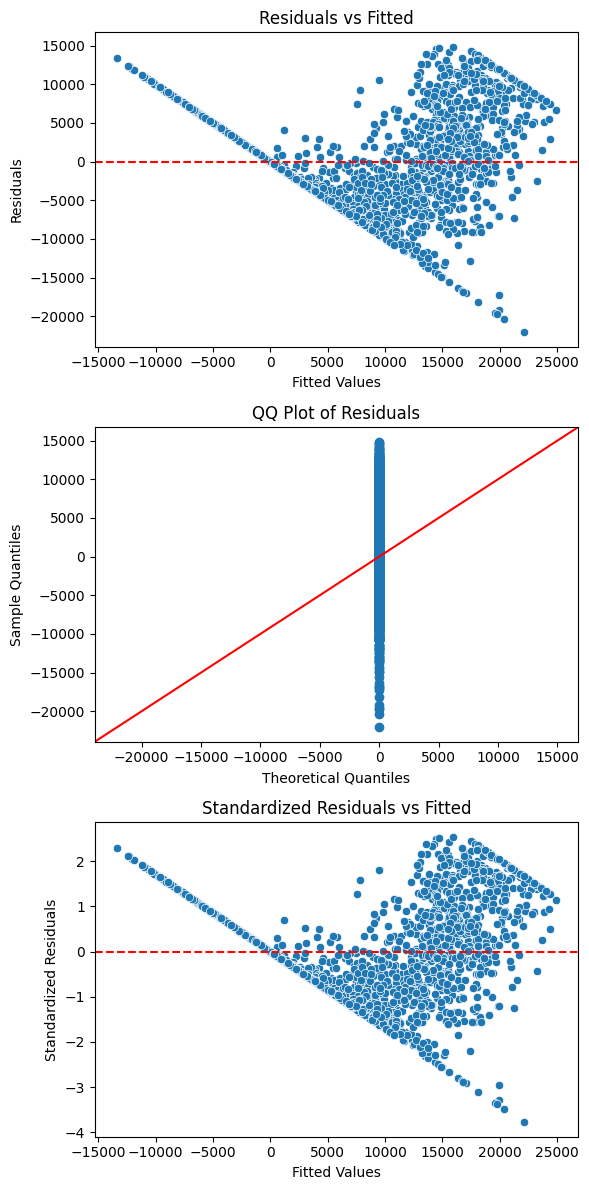

In [53]:
import scipy.stats as stats


# Residuals and Fitted values
residuals = model_sm.resid
fitted_vals = model_sm.fittedvalues

# Standardized residuals
standardized_residuals = residuals / np.std(residuals)

# QQ plot (Normality of residuals)
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# 1. Residuals vs Fitted
sns.scatterplot(x=fitted_vals, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Residuals vs Fitted")
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")

# 2. QQ Plot
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("QQ Plot of Residuals")

# 3. Standardized Residuals vs Fitted
sns.scatterplot(x=fitted_vals, y=standardized_residuals, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_title("Standardized Residuals vs Fitted")
axes[2].set_xlabel("Fitted Values")
axes[2].set_ylabel("Standardized Residuals")

plt.tight_layout()
plt.show()


### Diagnostic Residual Analysis

#### 1. Residuals vs Fitted Plot

* Strong **non-random funnel-shaped pattern** is observed.
* Residuals increase significantly in both positive and negative directions as fitted values increase.
* Indicates **non-linearity** in the data that the model fails to capture.
* Suggests **heteroscedasticity** (non-constant variance of residuals), violating a key assumption of linear regression.
* Presence of clusters also points to possible model misspecification or omitted variables.

#### 2. Q-Q Plot (Quantile-Quantile Plot)

* Most residuals are **not aligned with the diagonal reference line**.
* Heavy tails are visible, indicating **non-normal distribution** of residuals.
* The vertical distribution near the center is extremely dense, suggesting residuals are **heavily concentrated around zero**, but with strong **deviations at extremes**.
* Confirms violation of **normality assumption**, which affects inference and validity of p-values in linear models.

#### 3. Standardized Residuals vs Fitted Plot

* Confirms the same funnel pattern seen in the first plot.
* Standardized residuals are bounded within ±3, but show **clear heteroscedasticity**.
* Suggests that variance of errors is increasing with fitted values.
* Some mild outliers appear near the edges but within acceptable range.
* Reinforces conclusion that a **linear model is inadequate** for the data.

---

### Overall Interpretation

* The residual diagnostics indicate multiple violations of linear regression assumptions:

  * **Non-linearity**
  * **Heteroscedasticity**
  * **Non-normality of residuals**
* This pattern suggests the use of a **more flexible non-linear model** such as XGBoost or LightGBM would likely improve performance.
* These plots confirm what was previously seen in the linear residual plots: **linear models underfit the data** and fail to model its complexity accurately.



## Elastic Net Regressor

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
# Create and fit the model
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=0.01, random_state=42)

In [56]:
# Evaluate
evaluate_model(elastic_model,X_train, y_train, X_test, y_test, "Elastic Net Regression ", results)


Elastic Net Regression  Results:
Train -> R²: 0.6681, RMSE: 5842.7852, MAE: 4736.1544
Test  -> R²: 0.6398, RMSE: 6052.8860, MAE: 4847.1991


## SVR

In [57]:
from sklearn.svm import SVR

In [58]:
# Create and train the model (using RBF kernel)
svr = SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=0.01)
svr.fit(X_train, y_train)

# Predict
y_pred_svr = svr.predict(X_test)

# Evaluate
evaluate_model(svr,X_train, y_train, X_test, y_test, "SVR (RBF)", results)


SVR (RBF) Results:
Train -> R²: 0.8472, RMSE: 3964.4213, MAE: 2369.9512
Test  -> R²: 0.8153, RMSE: 4334.1480, MAE: 2580.0169


## RandomForest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
evaluate_model(rf_model,X_train, y_train, X_test, y_test, "Random Forest", results)



Random Forest Results:
Train -> R²: 0.9881, RMSE: 1107.0725, MAE: 512.5357
Test  -> R²: 0.8851, RMSE: 3418.3187, MAE: 1528.6576


## XGBoost

In [61]:
from xgboost import XGBRegressor

# Create and fit model
xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
evaluate_model(xgb,X_train, y_train, X_test, y_test, "XGBoost", results)



XGBoost Results:
Train -> R²: 0.9990, RMSE: 324.3140, MAE: 191.3958
Test  -> R²: 0.9046, RMSE: 3115.7648, MAE: 1533.5797


### Hyperparamter tuning - using Randomisedsearchcv

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

In [63]:
param_dist = {
    'n_estimators': randint(100, 1000),            # Wider range
    'max_depth': randint(3, 15),                   # Allow deeper trees
    'learning_rate': uniform(0.005, 0.3),          # Include very low rates
    'subsample': uniform(0.5, 0.5),                # 0.5 to 1.0
    'colsample_bytree': uniform(0.5, 0.5),         # 0.5 to 1.0
    'min_child_weight': randint(1, 20),            # Try wider range
    'gamma': uniform(0, 1),                        # Increase range
    'reg_alpha': uniform(0, 2),                    # L1 reg
    'reg_lambda': uniform(0, 2)                    # L2 reg
}


In [64]:
xgb_model = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=300,                 # Try 100 different combinations
    scoring='r2',               # Optimize R²
    cv=5,                       # 5-fold CV
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_xgb = random_search.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [65]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'colsample_bytree': np.float64(0.8976709189795486), 'gamma': np.float64(0.7450645481202204), 'learning_rate': np.float64(0.021464784393942477), 'max_depth': 5, 'min_child_weight': 18, 'n_estimators': 542, 'reg_alpha': np.float64(1.6578309483013547), 'reg_lambda': np.float64(0.07401526943098524), 'subsample': np.float64(0.7981349392410265)}


## Rebuilding the XGBoost model

In [66]:
best_params = {
    'colsample_bytree': 0.878540601021228,
    'gamma': 0.37785054927578643,
    'learning_rate': 0.07732544969888956,
    'max_depth': 11,
    'min_child_weight': 14,
    'n_estimators': 100,
    'reg_alpha': 1.9081020545174447,
    'reg_lambda': 1.21234926890176,
    'subsample': 0.6143214027517314
}

# Create and fit the model with best params
xgb_tuned = XGBRegressor(random_state=42, **best_params)
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.878540601021228, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.37785054927578643, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07732544969888956,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=14, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [67]:
# Predict
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Evaluate
evaluate_model(xgb_tuned,X_train, y_train, X_test, y_test, "XGBoost_tuned", results)


XGBoost_tuned Results:
Train -> R²: 0.9743, RMSE: 1625.3332, MAE: 848.9905
Test  -> R²: 0.8928, RMSE: 3302.5316, MAE: 1736.0532


## LGBM

In [68]:
from lightgbm import LGBMRegressor

# Train model
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate
evaluate_model(lgbm,X_train, y_train, X_test, y_test, "LightGBM", results)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 11
[LightGBM] [Info] Start training from score 6932.976455

LightGBM Results:
Train -> R²: 0.9807, RMSE: 1410.1422, MAE: 736.3332
Test  -> R²: 0.8856, RMSE: 3411.4319, MAE: 1609.5478


In [69]:
# Define parameter distributions
param_dist = {
    'n_estimators': randint(200, 1000),
    'learning_rate': uniform(0.005, 0.3),
    'max_depth': randint(3, 15),
    'num_leaves': randint(20, 150),
    'min_child_samples': randint(5, 100),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 2),
    'reg_lambda': uniform(0, 2)
}


In [70]:
# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=300,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [71]:
# Fit to training data
random_search.fit(X_train, y_train)
best_lgbm = random_search.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 11
[LightGBM] [Info] Start training from score 6932.976455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

## Rebuilding the LGBoost model

In [72]:
# Best parameters from  RandomizedSearchCV
best_params = {
    'colsample_bytree': 0.932213782561936,
    'learning_rate': 0.02561384975548033,
    'max_depth': 12,
    'min_child_samples': 42,
    'n_estimators': 822,
    'num_leaves': 131,
    'reg_alpha': 1.935720069690061,
    'reg_lambda': 0.5908895549548405,
    'subsample': 0.9076892591352534
}

# Build the model
lgbm_tuned = LGBMRegressor(random_state=42, **best_params)

# Fit the model
lgbm_tuned.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 11
[LightGBM] [Info] Start training from score 6932.976455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(colsample_bytree=0.932213782561936,
              learning_rate=0.02561384975548033, max_depth=12,
              min_child_samples=42, n_estimators=822, num_leaves=131,
              random_state=42, reg_alpha=1.935720069690061,
              reg_lambda=0.5908895549548405, subsample=0.9076892591352534)

In [73]:
y_pred_lgb_tuned = lgbm_tuned.predict(X_test)

#Evaluate
evaluate_model(lgbm_tuned,X_train, y_train, X_test, y_test, "lgbm_tuned", results)


lgbm_tuned Results:
Train -> R²: 0.9790, RMSE: 1470.3223, MAE: 773.0072
Test  -> R²: 0.8907, RMSE: 3334.2952, MAE: 1638.4578


## Model Performance Comparison

In [74]:
# Flatten the results dictionary
df_results = pd.DataFrame([
    {
        'Model': model,
        'Train R²': metrics['Train']['R²'],
        'Train RMSE': metrics['Train']['RMSE'],
        'Train MAE': metrics['Train']['MAE'],
        'Test R²': metrics['Test']['R²'],
        'Test RMSE': metrics['Test']['RMSE'],
        'Test MAE': metrics['Test']['MAE'],
    }
    for model, metrics in results.items()
])


In [75]:
# Sort based on highest Test R²
df_results = df_results.sort_values(by='Test R²', ascending=False)
df_results

,Model,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
4,XGBoost,0.998978,324.313978,191.395817,0.904551,3115.764835,1533.579694
5,XGBoost_tuned,0.974319,1625.333163,848.990506,0.892765,3302.531594,1736.053154
7,lgbm_tuned,0.978984,1470.322302,773.007241,0.890693,3334.295177,1638.457811
6,LightGBM,0.980669,1410.142205,736.333211,0.885577,3411.431853,1609.547815
3,Random Forest,0.988085,1107.072484,512.535665,0.885114,3418.318705,1528.657641
2,SVR (RBF),0.847213,3964.421327,2369.951202,0.815308,4334.148016,2580.016861
0,Linear Regression,0.668142,5842.686537,4738.604363,0.639790,6052.813075,4849.174724
1,Elastic Net Regression,0.668131,5842.785243,4736.154382,0.639781,6052.886037,4847.199051


In [76]:
# Sort based on least Test MAE
df_results = df_results.sort_values(by='Test MAE', ascending=True)
df_results

,Model,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
3,Random Forest,0.988085,1107.072484,512.535665,0.885114,3418.318705,1528.657641
4,XGBoost,0.998978,324.313978,191.395817,0.904551,3115.764835,1533.579694
6,LightGBM,0.980669,1410.142205,736.333211,0.885577,3411.431853,1609.547815
7,lgbm_tuned,0.978984,1470.322302,773.007241,0.890693,3334.295177,1638.457811
5,XGBoost_tuned,0.974319,1625.333163,848.990506,0.892765,3302.531594,1736.053154
2,SVR (RBF),0.847213,3964.421327,2369.951202,0.815308,4334.148016,2580.016861
1,Elastic Net Regression,0.668131,5842.785243,4736.154382,0.639781,6052.886037,4847.199051
0,Linear Regression,0.668142,5842.686537,4738.604363,0.639790,6052.813075,4849.174724


## Model Performance Comparison Report

The best-performing model overall is XGBoost (Model 4). It achieves the highest R² values on both training (0.9989) and testing (0.9046) data, along with the lowest training error. Its test RMSE and MAE are lower than those of all other models, indicating reliable performance.

The tuned version of XGBoost (Model 5) shows slightly reduced test accuracy with a Test R² of 0.8948 and higher prediction errors. This suggests that the tuning may have led to mild overfitting.

Linear Regression and Elastic Net (Models 0 and 1) perform the worst. Their Test R² scores are around 0.64, with very high RMSE and MAE values, indicating poor ability to capture the complexity of the dataset.

In summary, XGBoost is the most accurate and reliable model, followed closely by LightGBM and Random Forest. Linear models are not suitable for this dataset due to their high bias and low predictive performance.


### Comparative Evaluation of Regression Models Based on R², RMSE, and MAE

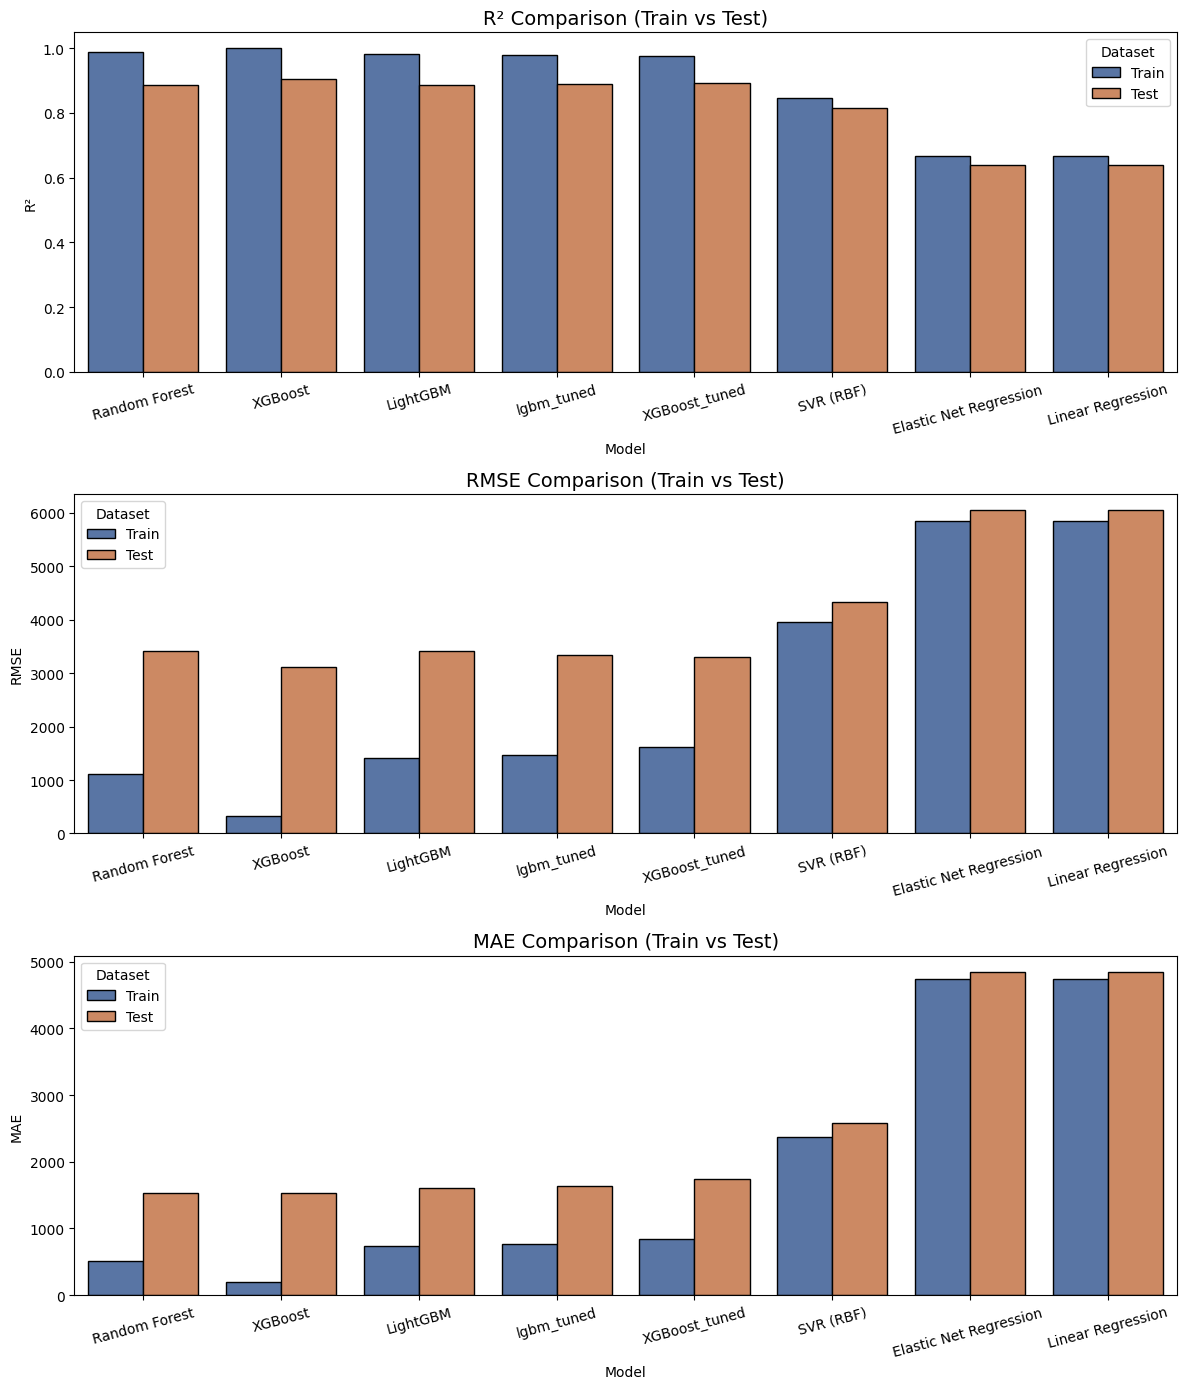

In [77]:
# Melt and split
results_long = pd.melt(
    df_results,
    id_vars='Model',
    value_vars=['Train R²', 'Train RMSE', 'Train MAE', 'Test R²', 'Test RMSE', 'Test MAE'],
    var_name='Metric',
    value_name='Value'
)

# Split into "Train"/"Test" and "R²"/"RMSE"/"MAE"
results_long[['Dataset', 'Metric_Type']] = results_long['Metric'].str.split(' ', expand=True)

# Set up the figure
metrics_to_plot = ['R²', 'RMSE', 'MAE']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharex=False)

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(
        data=results_long[results_long['Metric_Type'] == metric],
        x='Model', y='Value', hue='Dataset', ax=axes[i],
        palette='deep', edgecolor='black'
    )
    axes[i].set_title(f'{metric} Comparison (Train vs Test)', fontsize=14)
    axes[i].set_ylabel(metric)
    axes[i].legend(title='Dataset')
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


##  Actual vs Predicted Plot
What it shows:

How close the predicted values are to the actual values.

- Ideal case: all points lie on the 45-degree red line (perfect prediction).

X-axis: Actual values
Y-axis: Predicted values

- Helps to see:
Overall model fit

Under/over-prediction trends

Outliers (far from the diagonal line)

### Actual vs Predicted scatter plots for the linear models (Linear regression, Elastic net regression)

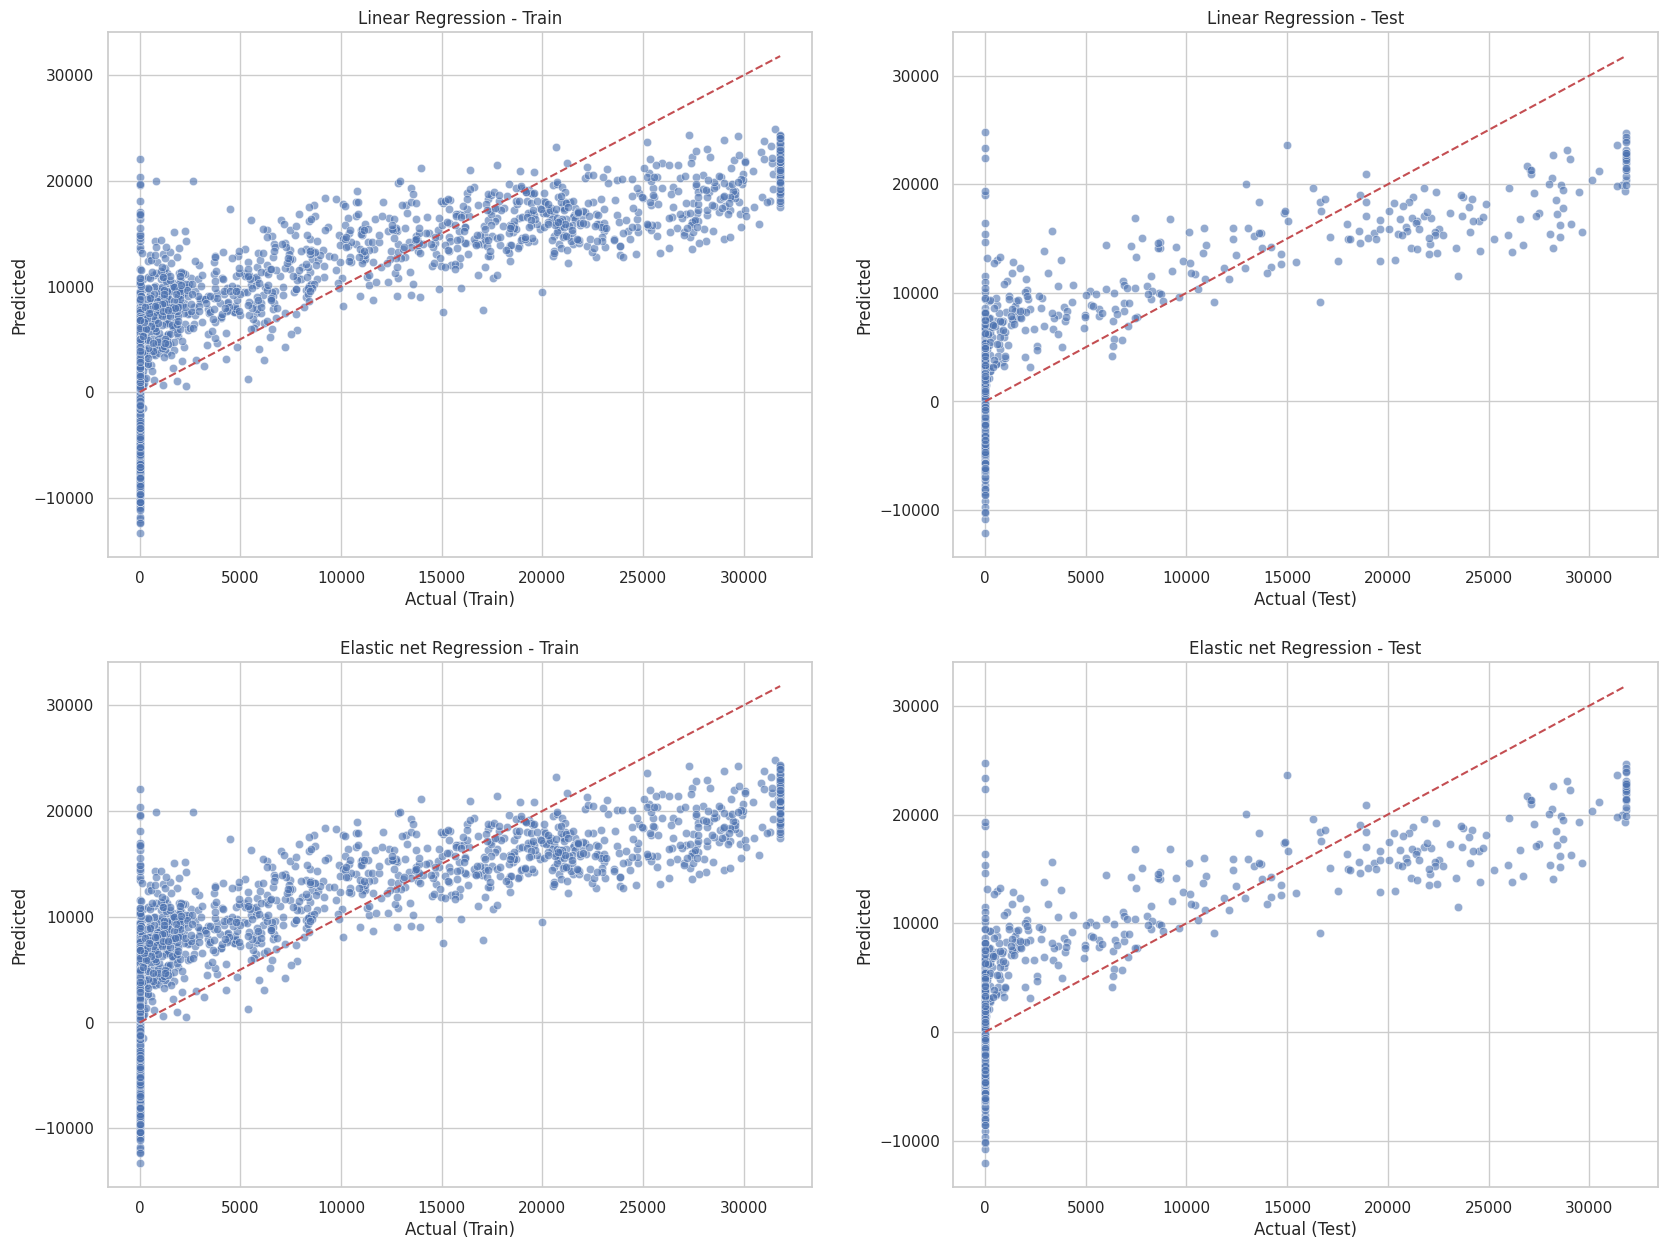

In [78]:
# Predict on Train and Test sets
y_pred_lr_train = linear_model.predict(X_train)
y_pred_lr_test = linear_model.predict(X_test)

y_pred_elastic_train = elastic_model.predict(X_train)
y_pred_elastic_test = elastic_model.predict(X_test)

# Common style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# ---------- Linear Regression ----------
# Train
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_lr_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual (Train)")
plt.ylabel("Predicted")
plt.title("Linear Regression - Train")
plt.grid(True)

# Test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted")
plt.title("Linear Regression - Test")
plt.grid(True)

# ---------- Elastic net Regression ----------
# Train
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_train, y=y_pred_elastic_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual (Train)")
plt.ylabel("Predicted")
plt.title("Elastic net Regression - Train")
plt.grid(True)

# Test
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=y_pred_elastic_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted")
plt.title("Elastic net Regression - Test")
plt.grid(True)




### Actual vs Predicted scatter plots for the three ensemble models (Random Forest, XGBoost, and LightGBM)

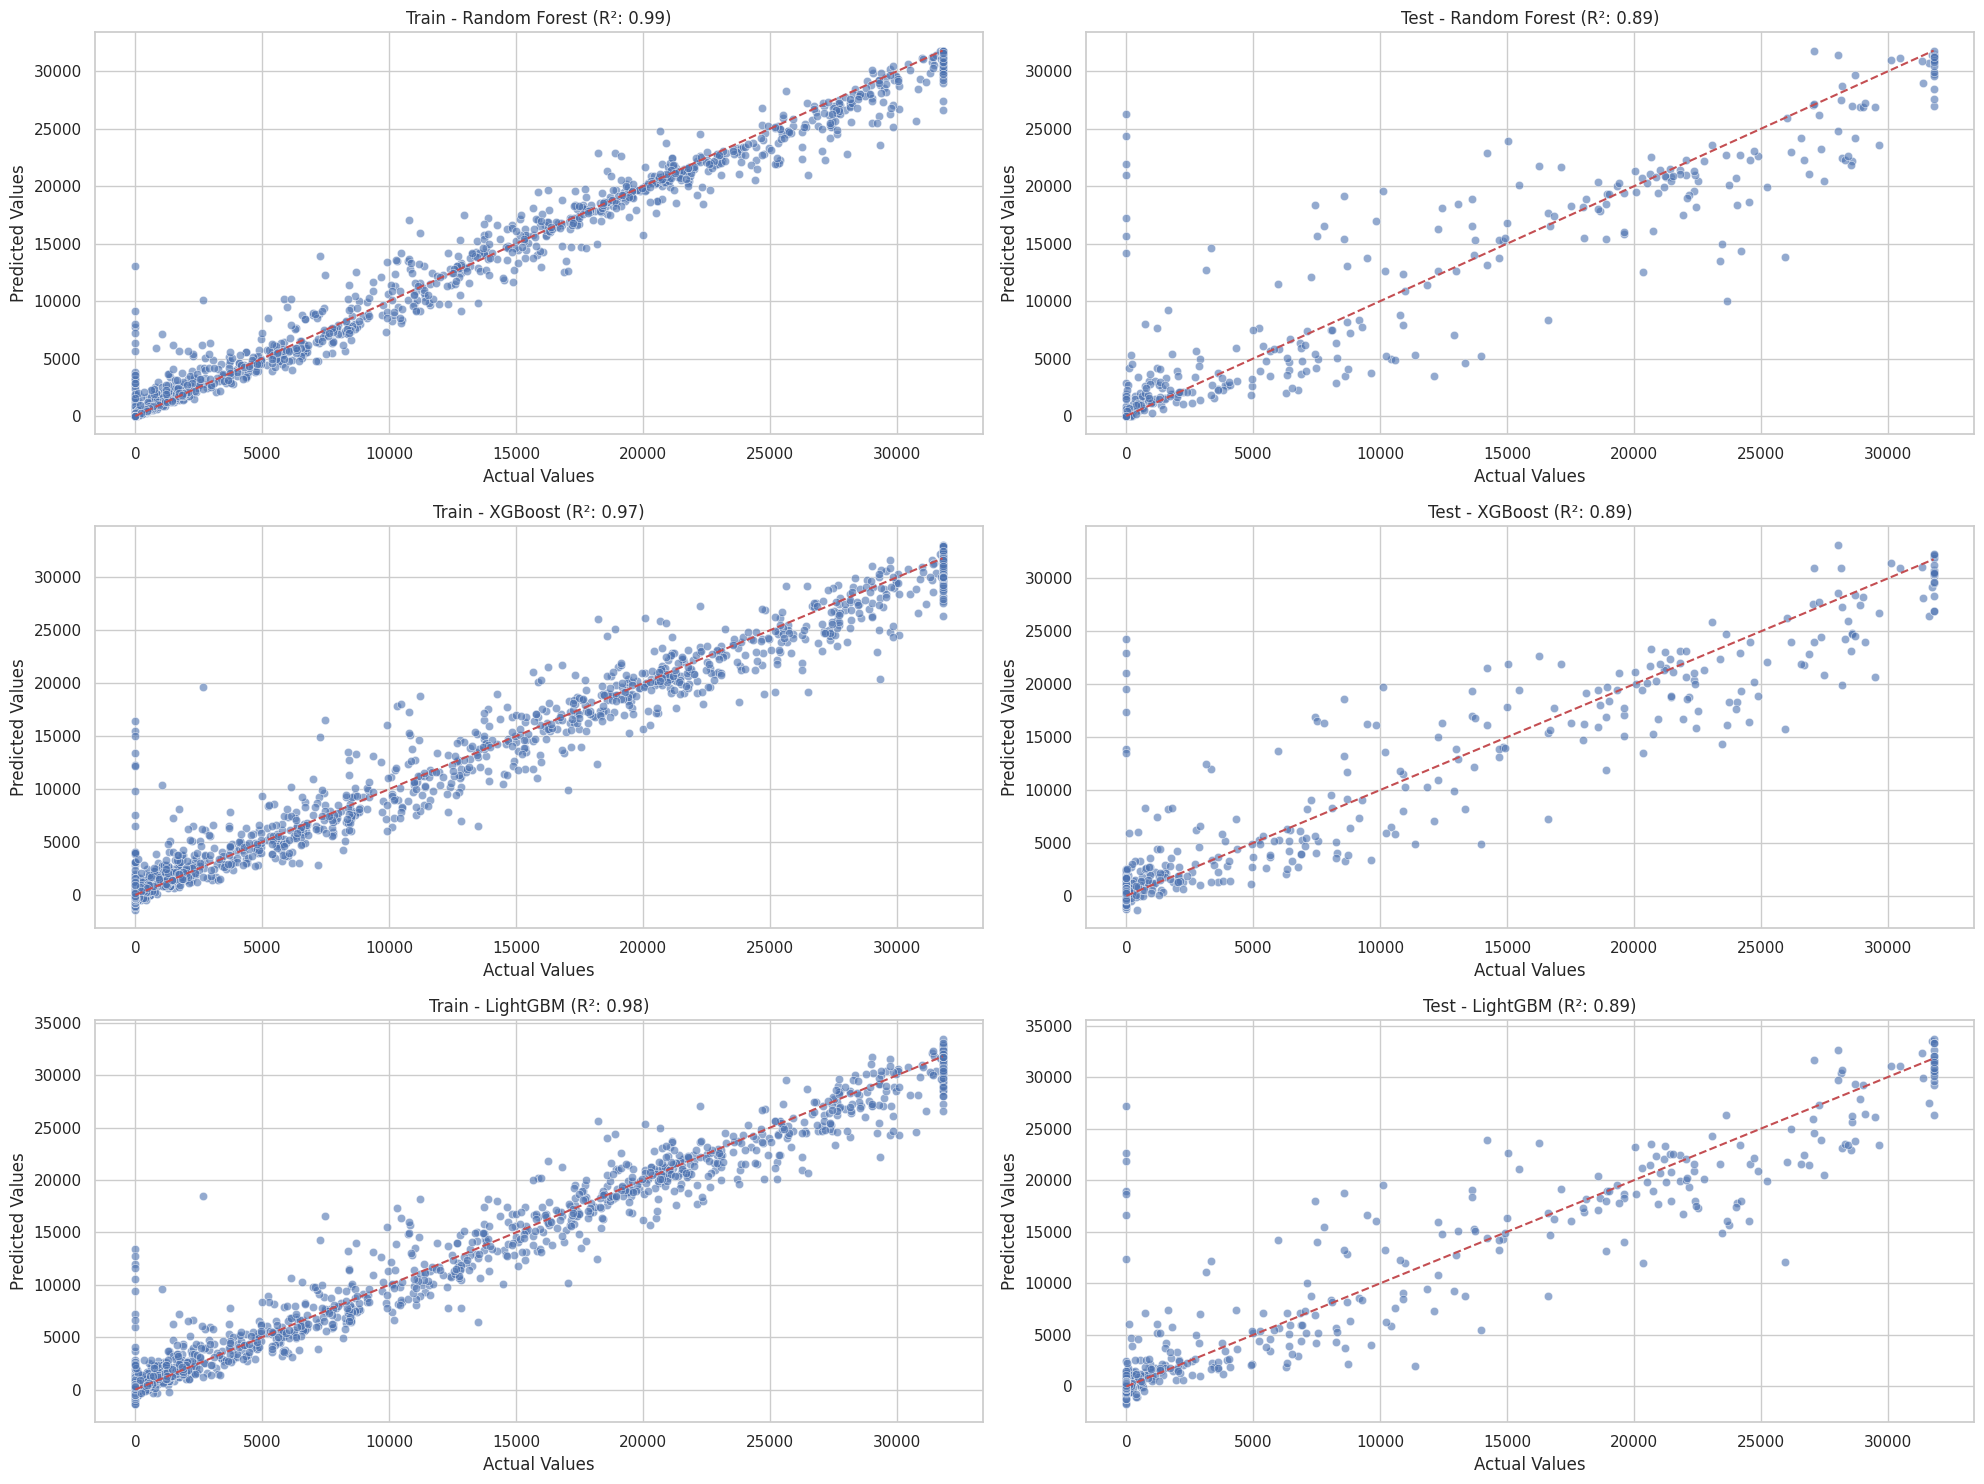

In [79]:
# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf  = rf_model.predict(X_test)

y_train_pred_xgb = xgb_tuned.predict(X_train)
y_test_pred_xgb  = xgb_tuned.predict(X_test)

y_train_pred_lgbm = lgbm_tuned.predict(X_train)
y_test_pred_lgbm  = lgbm_tuned.predict(X_test)

# Plot Style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# ---------- RANDOM FOREST ----------
# Train
plt.subplot(3, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_rf, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Train - Random Forest (R²: {r2_score(y_train, y_train_pred_rf):.2f})")
plt.grid(True)

# Test
plt.subplot(3, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Test - Random Forest (R²: {r2_score(y_test, y_test_pred_rf):.2f})")
plt.grid(True)

# ---------- XGBOOST ----------
# Train
plt.subplot(3, 2, 3)
sns.scatterplot(x=y_train, y=y_train_pred_xgb, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Train - XGBoost (R²: {r2_score(y_train, y_train_pred_xgb):.2f})")
plt.grid(True)

# Test
plt.subplot(3, 2, 4)
sns.scatterplot(x=y_test, y=y_test_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Test - XGBoost (R²: {r2_score(y_test, y_test_pred_xgb):.2f})")
plt.grid(True)

# ---------- LIGHTGBM ----------
# Train
plt.subplot(3, 2, 5)
sns.scatterplot(x=y_train, y=y_train_pred_lgbm, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Train - LightGBM (R²: {r2_score(y_train, y_train_pred_lgbm):.2f})")
plt.grid(True)

# Test
plt.subplot(3, 2, 6)
sns.scatterplot(x=y_test, y=y_test_pred_lgbm, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Test - LightGBM (R²: {r2_score(y_test, y_test_pred_lgbm):.2f})")
plt.grid(True)

plt.tight_layout()
plt.show()


### 1. Linear Models

#### Linear Regression:

* The predictions are highly biased towards the mean, with a large spread from the ideal diagonal line.
* The model underestimates high values and overestimates low values.
* This is consistent with the residuals showing funnel-shaped patterns and high errors.
* Both train and test plots show poor alignment with the red line, confirming underfitting.

#### Elastic Net Regression:

* Similar pattern to linear regression with slight improvement in capturing mid-range values.
* The test set still shows poor generalization and deviation from the ideal fit line.
* Reflects limitations of linear assumptions in capturing complex relationships in the data.

---

### 2. Non-Linear / Ensemble Models

#### Random Forest:

* Almost perfect fit on the training data with points tightly aligned to the diagonal.
* Slight overfitting is evident as the test plot shows wider spread, especially at higher values.
* Nonetheless, test performance remains reasonably strong with R² of 0.89.

#### XGBoost:

* Strong performance on both train and test data.
* Less overfitting than Random Forest, with a good generalization profile.
* Points are well-aligned with the ideal line, indicating consistent predictions across value ranges.

#### LightGBM:

* Similar behavior to XGBoost.
* Train fit is near-perfect, and test fit is consistent with only minor deviations at extreme values.
* Test alignment is slightly weaker than train, but still strong overall.

---

### Summary (Actual vs Predicted Plots)

* **Linear models** (Linear, Elastic Net) show poor alignment with actual values, leading to underfitting.
* **Ensemble models** (Random Forest, XGBoost, LightGBM) demonstrate strong predictive accuracy on training data and good generalization on test data.
* **XGBoost and LightGBM** maintain the best balance between train performance and test generalization.



## Residual Plot
What it shows:

The errors (residuals): how far off each prediction is from the true value.

X-axis: Actual or Predicted values
Y-axis: Residuals ( = actual − predicted )

- Helps to check:
If errors are randomly distributed (good sign)

Patterns or heteroscedasticity (bad sign: non-constant variance or bias)

### Residual Plot for linear models

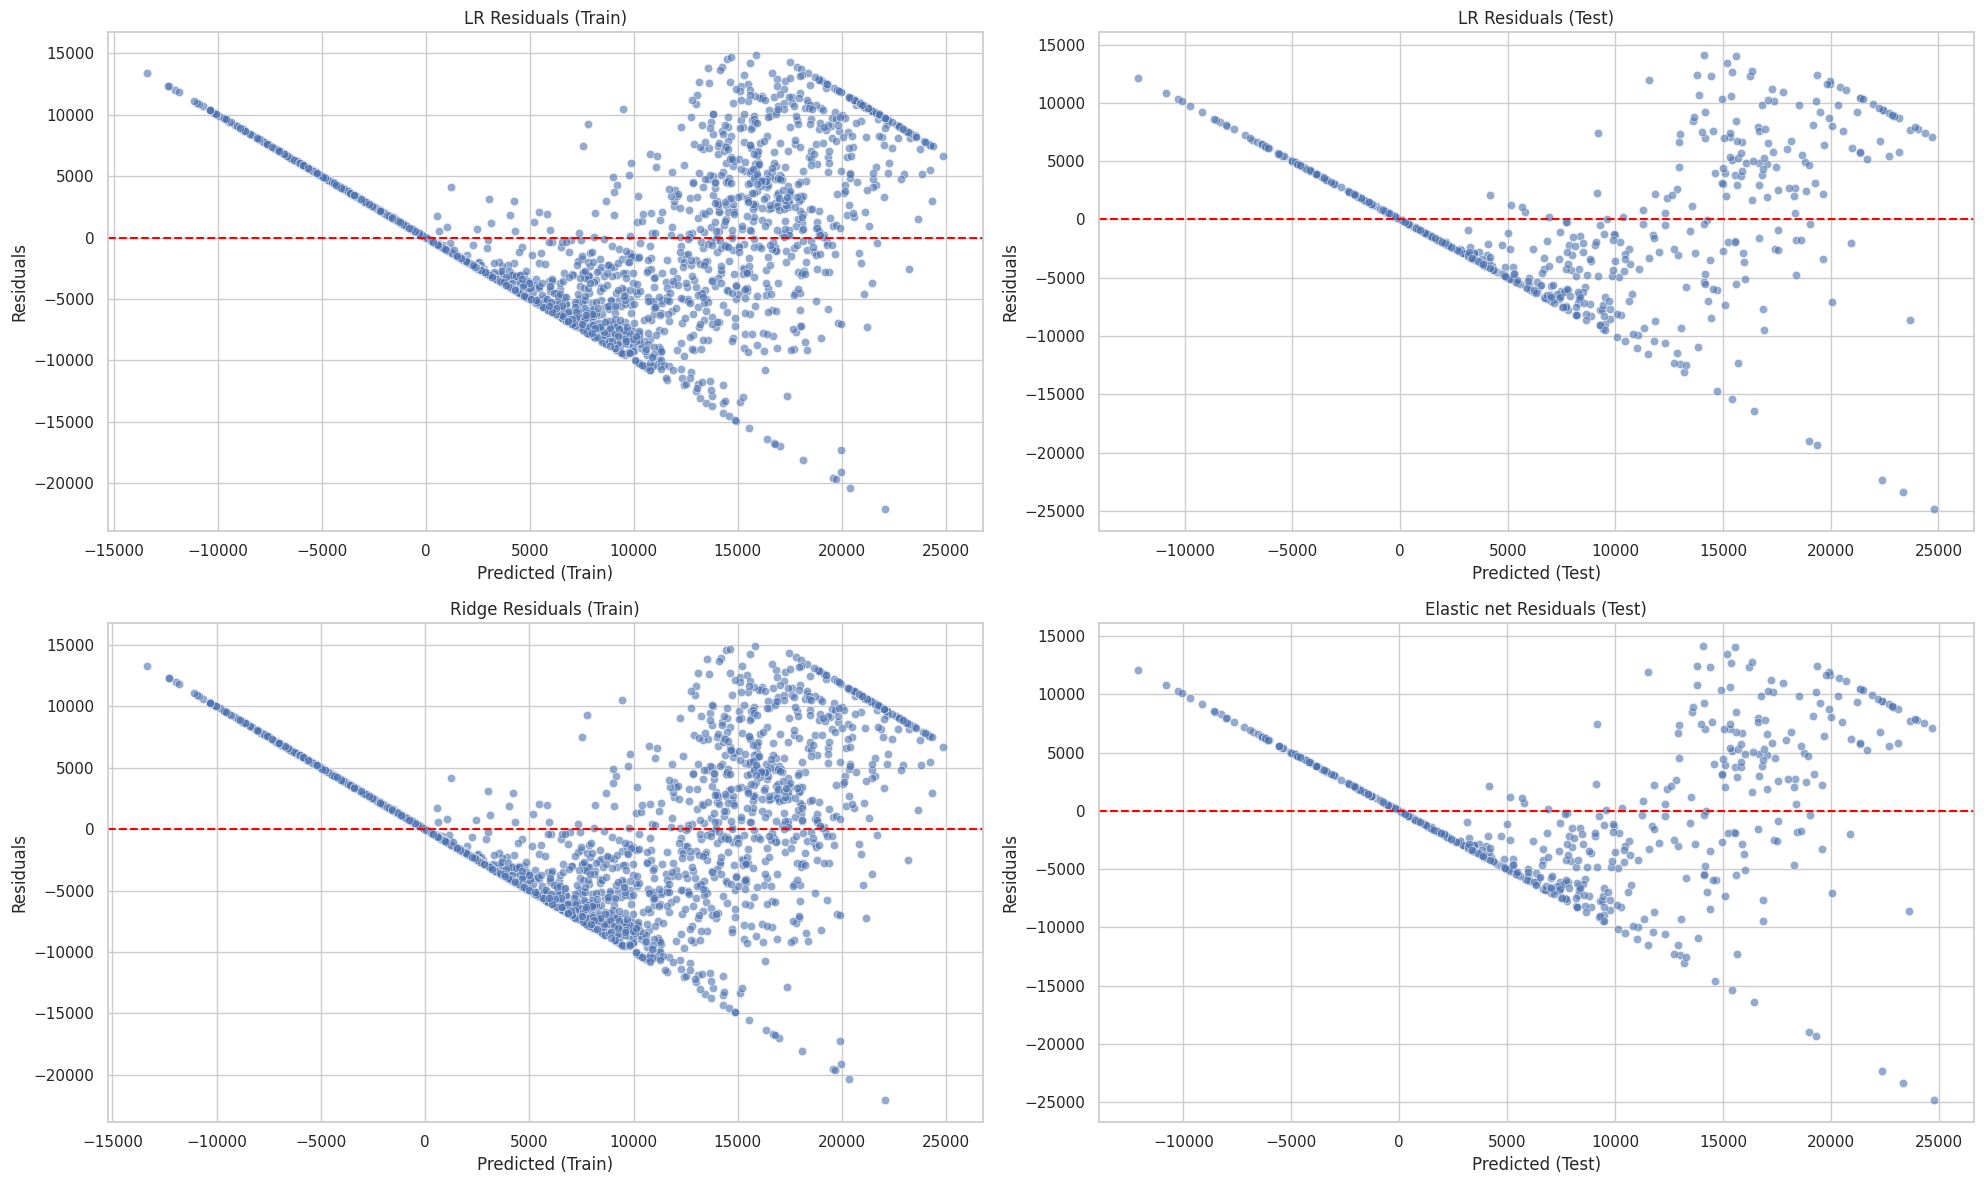

In [80]:
# Calculate residuals
residuals_lr_train = y_train - y_pred_lr_train
residuals_lr_test = y_test - y_pred_lr_test

residuals_elastic_train = y_train - y_pred_elastic_train
residuals_elastic_test = y_test - y_pred_elastic_test


# Set common plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# ----------- Linear Regression ------------
# Train
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred_lr_train, y=residuals_lr_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (Train)")
plt.ylabel("Residuals")
plt.title("LR Residuals (Train)")

# Test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_lr_test, y=residuals_lr_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (Test)")
plt.ylabel("Residuals")
plt.title("LR Residuals (Test)")

# ----------- Elastic net Regression ------------
# Train
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred_elastic_train, y=residuals_elastic_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (Train)")
plt.ylabel("Residuals")
plt.title("Ridge Residuals (Train)")

# Test
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_pred_elastic_test, y=residuals_elastic_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (Test)")
plt.ylabel("Residuals")
plt.title("Elastic net Residuals (Test)")

plt.tight_layout()
plt.show()


### Residual Plot for non linear models

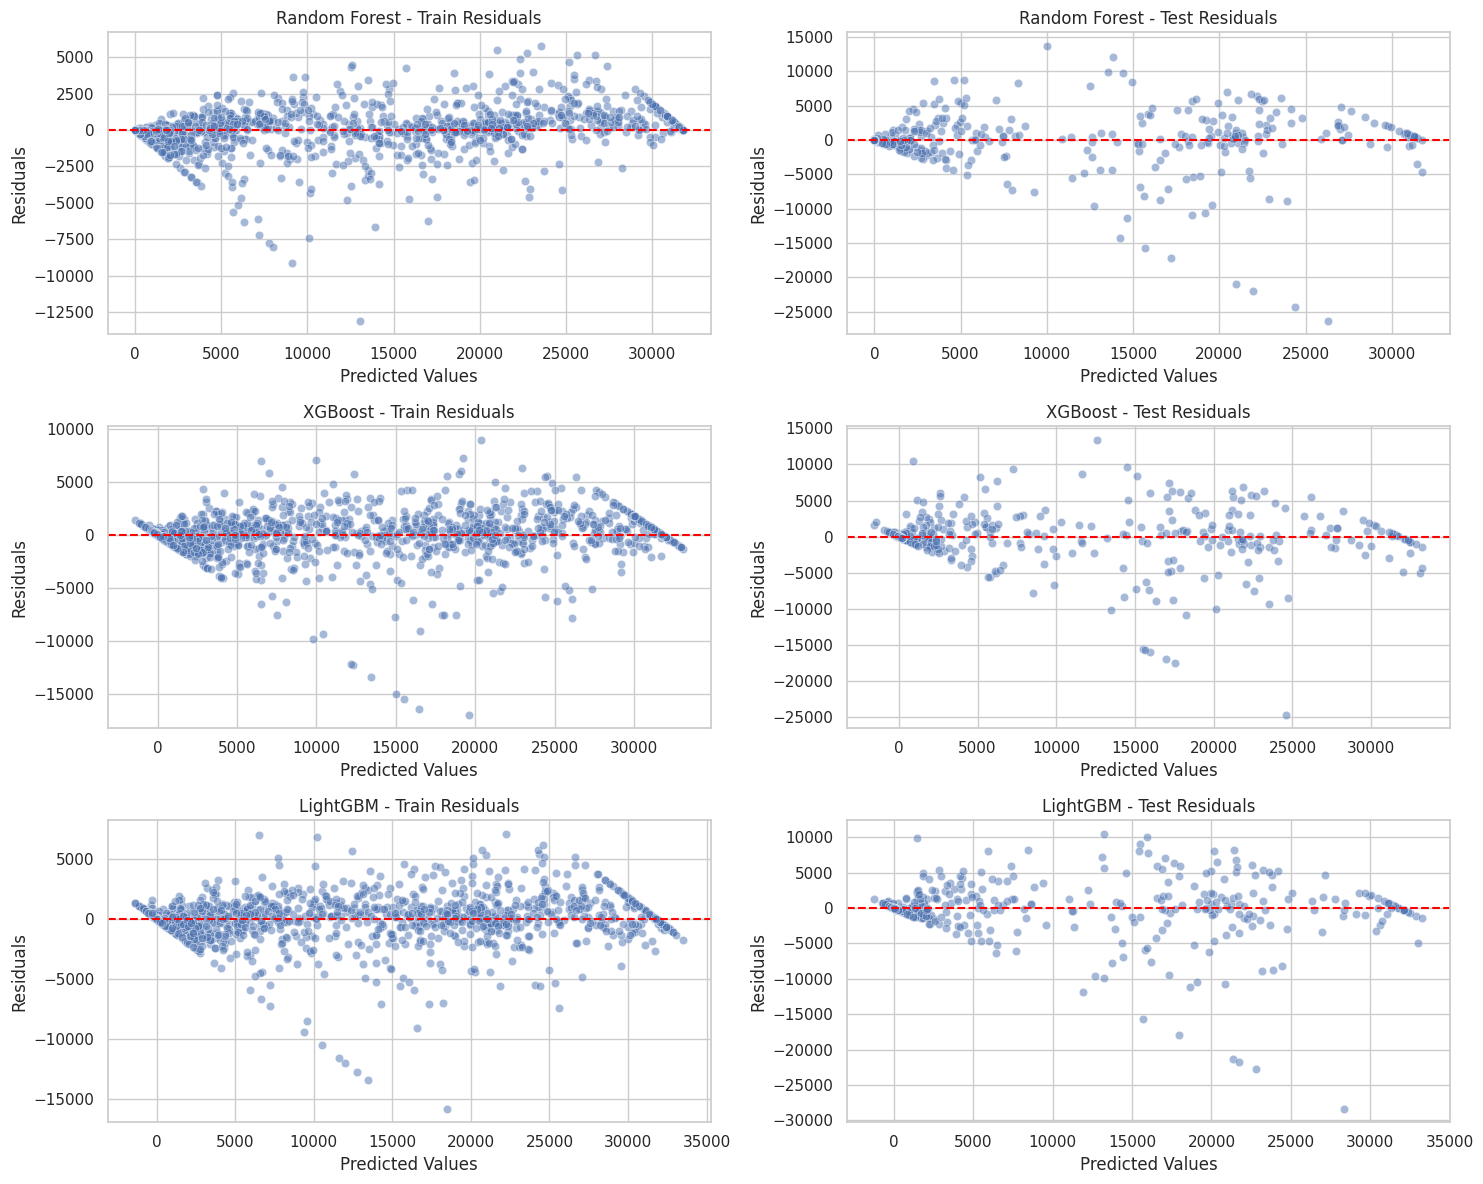

In [81]:
# Residuals - Train
residuals_train_rf = y_train - y_train_pred_rf
residuals_train_xgb = y_train - y_train_pred_xgb
residuals_train_lgbm = y_train - y_train_pred_lgbm

# Residuals - Test
residuals_test_rf = y_test - y_pred_rf
residuals_test_xgb = y_test - y_pred_xgb
residuals_test_lgbm = y_test - y_pred_lgbm


sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Helper function
def plot_residuals(ax, x, y, title):
    sns.scatterplot(x=x, y=y, alpha=0.5, ax=ax)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals")
    ax.set_title(title)
    ax.grid(True)

# Random Forest
plot_residuals(axs[0, 0], y_train_pred_rf, residuals_train_rf, "Random Forest - Train Residuals")
plot_residuals(axs[0, 1], y_pred_rf, residuals_test_rf, "Random Forest - Test Residuals")

# XGBoost
plot_residuals(axs[1, 0], y_train_pred_xgb, residuals_train_xgb, "XGBoost - Train Residuals")
plot_residuals(axs[1, 1], y_pred_xgb, residuals_test_xgb, "XGBoost - Test Residuals")

# LightGBM
plot_residuals(axs[2, 0], y_train_pred_lgbm, residuals_train_lgbm, "LightGBM - Train Residuals")
plot_residuals(axs[2, 1], y_pred_lgbm, residuals_test_lgbm, "LightGBM - Test Residuals")

plt.tight_layout()
plt.show()


### 1. Linear Models (Linear, Ridge, Elastic Net)

#### Observations:

* **All three models (LR, Ridge, Elastic Net)** show similar residual patterns:

  * Clear funnel shapes (residuals increase with predicted values).
  * Curved and fan-like spread — a strong sign of **heteroscedasticity** and **model misspecification**.
  * Residuals are **not randomly scattered**; they follow a structure, indicating **non-linearity** in the data that these models cannot capture.

#### Implications:

* Linear assumptions violated.
* Poor fit on both train and test sets.
* High residuals at extreme predicted values suggest underfitting.
* Model fails to capture the variance structure of the data.

---

### 2. Ensemble / Non-Linear Models (Random Forest, XGBoost, LightGBM)

#### Random Forest:

* **Train residuals are very tight** around zero (overfitting likely).
* **Test residuals are more dispersed**, especially for high predicted values.
* Residuals skew negatively in some regions.
* Overfitting visible: near-perfect training fit but less stable on test data.

#### XGBoost:

* **Train residuals** are fairly balanced and centered around zero.
* **Test residuals** also show some structure but are more symmetric than RF.
* Slight non-linearity appears in residual pattern at high prediction ranges.
* Less overfitting than RF, better generalization.

#### LightGBM:

* Similar residual patterns to XGBoost but with **slightly more dispersion** in test residuals.
* Residuals still fairly centered, indicating good fit.
* May slightly underperform XGBoost in generalization.

---

### Summary (Residual Plot )

* **Linear Models**: Residual plots show heteroscedasticity and non-random patterns. Models underfit due to their inability to capture non-linear relationships.
* **Random Forest**: Overfits the training data; test residuals show more spread and slight skewness.
* **XGBoost**: Best residual pattern overall; residuals well-centered and more uniformly spread.
* **LightGBM**: Slightly more dispersed than XGBoost but still much better than linear models.




## Feature Importance Plot (XGBoost)

/tmp/ipython-input-82-1181287458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


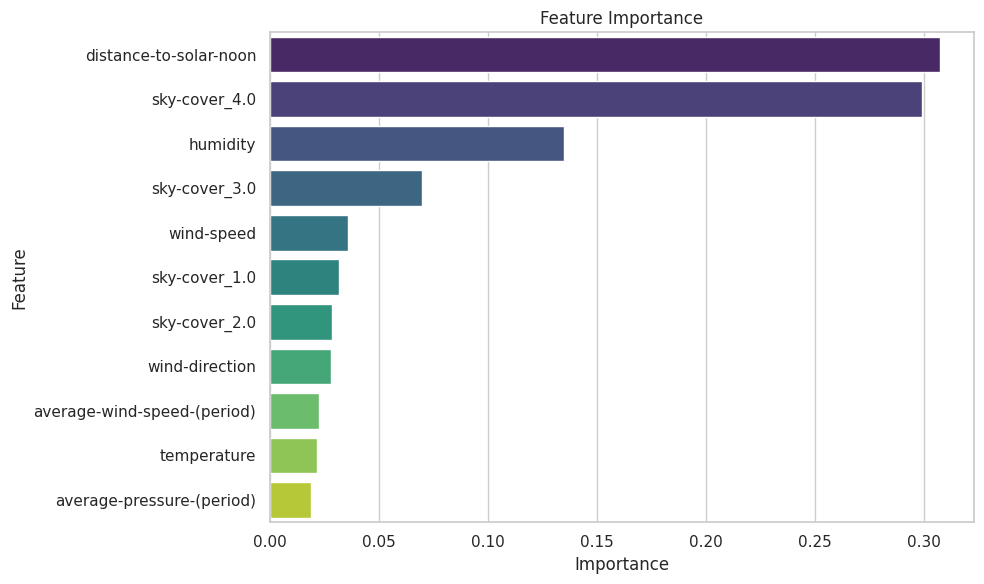

In [82]:

# Create a DataFrame of features and importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


## Learning Curve Plot

In [83]:
models = {
    "Linear Regression": linear_model,
    "ElasticNet": elastic_model,
    "XGBoost": xgb_tuned,
    "LightGBM": lgbm_tuned,
    "Random Forest": rf_model
}

In [84]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

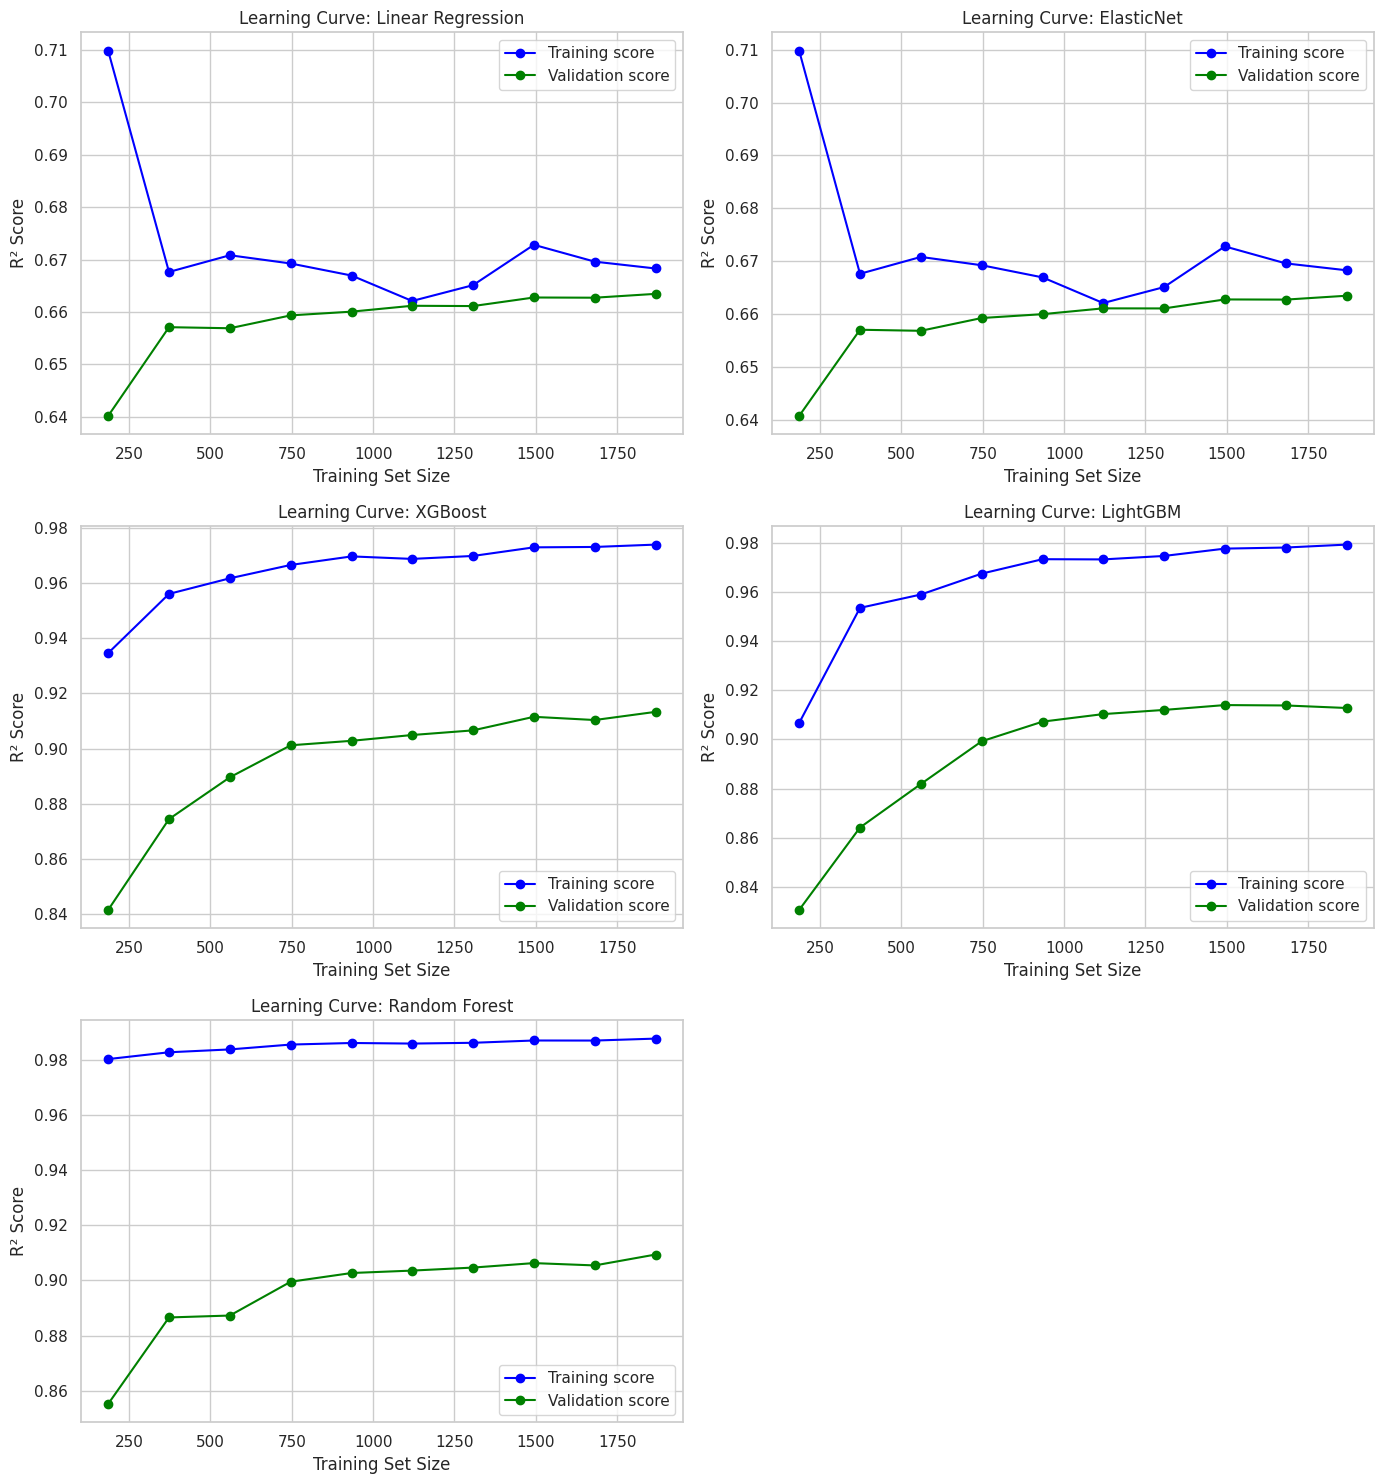

In [85]:
def plot_learning_curves_grid(models, X, y, cols=2):
    rows = int(np.ceil(len(models) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 5))
    axes = axes.flatten()  # to index easily

    for i, (name, model) in enumerate(models.items()):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y,
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=KFold(n_splits=5, shuffle=True, random_state=42),
            scoring='r2',
            n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        ax = axes[i]
        ax.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
        ax.plot(train_sizes, test_mean, 'o-', color="green", label="Validation score")
        ax.set_title(f"Learning Curve: {name}")
        ax.set_xlabel("Training Set Size")
        ax.set_ylabel("R² Score")
        ax.grid(True)
        ax.legend(loc="best")

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function
plot_learning_curves_grid(models, X_train, y_train, cols=2)


## Model-wise summary of the learning curves (training vs validation R² scores across training set sizes):


### 1. Linear Models

#### Linear Regression:

* Training score is low and stable (\~0.67).
* Validation score is consistently lower and improves only slightly with more data.
* High bias with low variance, indicating underfitting.
* Model is too simple to capture the data complexity.

#### Elastic Net:

* Slightly better training score than plain linear regression, but similar trend.
* Gap between training and validation curves is small, showing low variance.
* Still underfits the data, with R² capped around 0.66–0.67.



### 2. Ensemble / Non-Linear Models

#### XGBoost:

* High training score (above 0.96), showing strong learning capacity.
* Validation score improves steadily, flattening around 0.91.
* Small generalization gap; good trade-off between bias and variance.
* Model benefits significantly from increased data.

#### LightGBM:

* Very similar pattern to XGBoost with slightly higher training score.
* Validation R² rises quickly and stabilizes around 0.91.
* Slight overfitting is evident but within acceptable range.

#### Random Forest:

* Training R² is very high (\~0.98) and flat, indicating near-perfect memorization.
* Validation R² stabilizes around 0.89, showing good but slightly lower generalization.
* Largest generalization gap among the ensemble models, pointing to mild overfitting.



### Summary

* **Linear models** (Linear Regression, Elastic Net) show high bias and underfit the data even with more training points.
* **Ensemble models** (XGBoost, LightGBM, Random Forest) exhibit strong learning with much higher R² scores and benefit well from more training data.
* **XGBoost and LightGBM** strike the best balance between fit and generalization.
* **Random Forest** performs strongly but may overfit slightly as seen in the training-validation gap.


In [86]:
import pickle

# Replace this with your actual trained model
# best_xgb = xgb.best_estimator_

# Save the model
with open('solar_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)


In [87]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [88]:
%%writefile app.py
# Save a beautiful Streamlit app to app.py
import streamlit as st
import pickle
import numpy as np

# Load trained model
model = pickle.load(open("solar_model.pkl", "rb"))

# Page settings
st.set_page_config(page_title="Solar Power Predictor", page_icon="⚡", layout="centered")

# Title
st.markdown("<h1 style='color:#ffa500; text-align:center;'>⚡ Solar Power Prediction (kW)</h1>", unsafe_allow_html=True)
st.write("Enter weather/environmental inputs to estimate average solar power output (in kW over 3 hours).")
st.markdown("---")

# Input fields (11 total, matching model)
col1, col2 = st.columns(2)

with col1:
    distance = st.number_input("🌍 Distance to solar noon", value=0.1)
    temperature = st.number_input("🌡️ Temperature (°C)", value=25.0)
    wind_dir = st.number_input("🧭 Wind Direction (°)", value=180.0)
    wind_speed = st.number_input("💨 Wind Speed (m/s)", value=2.5)

with col2:
    sky_cover = st.selectbox("☁️ Sky Cover (0 = clear → 4 = covered)", [0, 1, 2, 3, 4])
    visibility = st.number_input("🔭 Visibility (km)", value=10.0)
    humidity = st.slider("💧 Humidity (%)", 0, 100, 60)
    avg_wind = st.number_input("🌀 Avg. Wind Speed (3h)", value=2.5)
    pressure = st.number_input("📈 Avg. Pressure (inHg)", value=29.9)


# Predict button
if st.button("⚡ Predict Power (kW)"):
    input_data = np.array([[distance, temperature, wind_dir, wind_speed,
                            sky_cover, visibility, humidity, avg_wind, pressure]])

    # Add 2 default values to make 11 features
    input_data = np.append(input_data, [0.0, 0.0]).reshape(1, -1)

    prediction_joules = model.predict(input_data)[0]
    power_kw = prediction_joules / 10800
    st.success(f"🔋 Estimated Average Power: {power_kw:.4f} kW")


Writing app.py


In [89]:
!wget  -q -o - ipv4.canhanzip.com

In [92]:
# # # Run the Streamlit app
!streamlit run app.py & npx localtunnel --port 8501





⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.226.151.37:8501

⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://shiny-heads-help.loca.lt
  Stopping...
^C
